# Inisialisasi Library

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LassoCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
train=pd.read_csv('train.csv')
target=pd.read_csv('target.csv')
test=pd.read_csv('test.csv')

In [3]:
train = pd.concat([train,target["coppaRisk"]], axis =1)

# Exploratory Data Analysis

In [4]:
train.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,False
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,False
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,False


In [5]:
target.head()

,coppaRisk
0,False
1,False
2,False
3,False
4,False


In [6]:
test.head()

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,2807,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,Medical,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,81.600000,5.0,NaN,low,low
1,1742,ICELAND,EMEA,0,Games,5000 - 10000,GLOBAL,True,True,low,0.0,0.027742,24.700000,0.0,NaN,low,low
2,806,UNITED STATES,RU,13059,Games,NaN,smartphone,True,False,high,99.0,9.249056,40.300000,4.0,NaN,low,low
3,2635,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Games,NaN,GLOBAL,True,False,high,NaN,NaN,39.233333,0.0,NaN,medium,low
4,9047,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Shopping,NaN,GLOBAL,NaN,NaN,NaN,NaN,NaN,65.533333,0.0,NaN,low,low


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3000 non-null   int64  
 1   developerCountry                 3000 non-null   object 
 2   countryCode                      2971 non-null   object 
 3   userRatingCount                  3000 non-null   int64  
 4   primaryGenreName                 3000 non-null   object 
 5   downloads                        2119 non-null   object 
 6   deviceType                       3000 non-null   object 
 7   hasPrivacyLink                   2684 non-null   object 
 8   hasTermsOfServiceLink            1039 non-null   object 
 9   hasTermsOfServiceLinkRating      1039 non-null   object 
 10  isCorporateEmailScore            2560 non-null   float64
 11  adSpent                          574 non-null    float64
 12  appAge              

In [9]:
# ? Data Size
print(f"Total size: {train.size} ")
print(f"Instances: {len(train.index)}")
print(f"Features: {len(train.columns)}")

Total size: 119000 
Instances: 7000
Features: 17


In [10]:
# ? Data Size
print(f"Total size: {test.size} ")
print(f"Instances: {len(test.index)}")
print(f"Features: {len(test.columns)}")

Total size: 51000 
Instances: 3000
Features: 17


In [11]:
train.describe()

,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating
count,7.000000e+03,5872.000000,1.321000e+03,6950.000000,5768.000000
mean,3.256274e+04,45.740293,3.977563e+03,57.093060,2.482490
std,5.501431e+05,49.361215,9.219919e+04,37.169895,1.905712
min,0.000000e+00,0.000000,7.038525e-03,0.533333,0.000000
25%,0.000000e+00,0.000000,1.086920e+00,27.533333,0.000000
50%,1.000000e+00,0.000000,7.945580e+00,52.866667,3.000000
75%,8.800000e+01,99.000000,4.908375e+01,80.000000,4.000000
max,3.854334e+07,99.000000,3.143906e+06,196.466667,5.000000


In [12]:
test.describe()

,ID,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating
count,3000.000000,3.000000e+03,2560.000000,574.000000,2983.000000,2486.000000
mean,5016.298333,3.576905e+04,46.444922,286.612276,56.044396,2.490748
std,2894.991128,4.455556e+05,49.415285,1890.997697,36.417410,1.896230
min,1.000000,0.000000e+00,0.000000,0.007450,-1.200000,0.000000
25%,2495.750000,0.000000e+00,0.000000,1.121507,26.933333,0.000000
50%,4969.500000,1.000000e+00,0.000000,7.186537,51.933333,3.000000
75%,7585.500000,8.250000e+01,99.000000,44.878463,77.750000,4.000000
max,9999.000000,1.319941e+07,99.000000,37542.779693,194.466667,5.000000


In [13]:
print("N amount of unqiue value from each categorical features")
train.nunique(axis = 0)

N amount of unqiue value from each categorical features


developerCountry                    114
countryCode                         119
userRatingCount                    1528
primaryGenreName                     46
downloads                            26
deviceType                            5
hasPrivacyLink                        2
hasTermsOfServiceLink                 2
hasTermsOfServiceLinkRating           2
isCorporateEmailScore                 2
adSpent                            1321
appAge                             3194
averageUserRating                     6
appContentBrandSafetyRating           3
appDescriptionBrandSafetyRating       3
mfaRating                             3
coppaRisk                             2
dtype: int64

In [14]:
print("N amount of unqiue value from each categorical features")
test.nunique(axis = 0)

N amount of unqiue value from each categorical features


ID                                 3000
developerCountry                     89
countryCode                          92
userRatingCount                     763
primaryGenreName                     45
downloads                            21
deviceType                            5
hasPrivacyLink                        2
hasTermsOfServiceLink                 2
hasTermsOfServiceLinkRating           2
isCorporateEmailScore                 2
adSpent                             574
appAge                             2002
averageUserRating                     6
appContentBrandSafetyRating           3
appDescriptionBrandSafetyRating       3
mfaRating                             3
dtype: int64

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

In [15]:
for col in train: 
    print(f"{col} : {train [col].isnull().sum()/len(train)*100}")

developerCountry : 0.0
countryCode : 0.9142857142857144
userRatingCount : 0.0
primaryGenreName : 0.0
downloads : 30.7
deviceType : 0.0
hasPrivacyLink : 10.714285714285714
hasTermsOfServiceLink : 66.21428571428571
hasTermsOfServiceLinkRating : 66.21428571428571
isCorporateEmailScore : 16.114285714285714
adSpent : 81.12857142857143
appAge : 0.7142857142857143
averageUserRating : 17.599999999999998
appContentBrandSafetyRating : 88.02857142857144
appDescriptionBrandSafetyRating : 0.0
mfaRating : 0.0
coppaRisk : 0.0


In [16]:
for col in test: 
    print(f"{col} : {test [col].isnull().sum()/len(test)*100}")

ID : 0.0
developerCountry : 0.0
countryCode : 0.9666666666666667
userRatingCount : 0.0
primaryGenreName : 0.0
downloads : 29.366666666666667
deviceType : 0.0
hasPrivacyLink : 10.533333333333333
hasTermsOfServiceLink : 65.36666666666666
hasTermsOfServiceLinkRating : 65.36666666666666
isCorporateEmailScore : 14.666666666666666
adSpent : 80.86666666666666
appAge : 0.5666666666666667
averageUserRating : 17.133333333333333
appContentBrandSafetyRating : 89.03333333333333
appDescriptionBrandSafetyRating : 0.0
mfaRating : 0.0


In [17]:
import pandas as pd

# Fungsi untuk menghitung persentase outlier
def calculate_outlier_percentage(series):
    Q1 = series.quantile(0.25)  
    Q3 = series.quantile(0.75)  
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_percentage = (len(outliers) / len(series)) * 100  # Persentase outlier
    return outlier_percentage
numeric_cols = train.select_dtypes(include=['number']).columns

outlier_threshold = 5  
outlier_results = []

for col in numeric_cols:
    outlier_percentage = calculate_outlier_percentage(train[col])  # Persentase outlier per kolom
    significant_outlier = "Signifikan" if outlier_percentage > outlier_threshold else "Tidak Signifikan"
    outlier_results.append({'Column': col, 'Outlier Percentage': outlier_percentage, 'Significance': significant_outlier})

outlier_df = pd.DataFrame(outlier_results)

print(outlier_df)


                  Column  Outlier Percentage      Significance
0        userRatingCount           20.771429        Signifikan
1  isCorporateEmailScore            0.000000  Tidak Signifikan
2                adSpent            3.185714  Tidak Signifikan
3                 appAge            1.142857  Tidak Signifikan
4      averageUserRating            0.000000  Tidak Signifikan


In [18]:
numeric_cols1 = test.select_dtypes(include=['number']).columns

outlier_threshold = 5  
outlier_results = []

for col in numeric_cols1:
    outlier_percentage = calculate_outlier_percentage(test[col])  # Persentase outlier per kolom
    significant_outlier = "Signifikan" if outlier_percentage > outlier_threshold else "Tidak Signifikan"
    outlier_results.append({'Column': col, 'Outlier Percentage': outlier_percentage, 'Significance': significant_outlier})

outlier_df = pd.DataFrame(outlier_results)

print(outlier_df)

                  Column  Outlier Percentage      Significance
0                     ID            0.000000  Tidak Signifikan
1        userRatingCount           21.066667        Signifikan
2  isCorporateEmailScore            0.000000  Tidak Signifikan
3                adSpent            3.100000  Tidak Signifikan
4                 appAge            1.333333  Tidak Signifikan
5      averageUserRating            0.000000  Tidak Signifikan


In [19]:
duplicate_count = train.duplicated().sum()

print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 3


In [20]:
duplicate_count = test.duplicated().sum()

print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 0


In [21]:
for i in train.columns:
    print("Kolom " + i + " berisi:\n")
    print(train[i].value_counts())

Kolom developerCountry berisi:

developerCountry
ADDRESS NOT LISTED IN PLAYSTORE                                               4338
CANNOT IDENTIFY COUNTRY                                                        769
UNITED STATES                                                                  324
CHINA                                                                          150
INDIA                                                                          131
                                                                              ... 
PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.       1
GUATEMALA                                                                        1
GREECE                                                                           1
HONDURAS                                                                         1
STATUTORY MASKING ENABLED                                                        1
Name: count, Length: 114, dtype: int64

In [22]:
for i in test.columns:
    print("Kolom " + i + " berisi:\n")
    print(test[i].value_counts())

Kolom ID berisi:

ID
2807    1
9397    1
1148    1
5992    1
6553    1
       ..
9739    1
2334    1
8858    1
3255    1
6406    1
Name: count, Length: 3000, dtype: int64
Kolom developerCountry berisi:

developerCountry
ADDRESS NOT LISTED IN PLAYSTORE       1821
CANNOT IDENTIFY COUNTRY                331
UNITED STATES                          179
CHINA                                   71
INDIA                                   55
                                      ... 
MALTA                                    1
MAURITIUS                                1
VENEZUELA (BOLIVARIAN REPUBLIC OF)       1
KENYA                                    1
CROATIA                                  1
Name: count, Length: 89, dtype: int64
Kolom countryCode berisi:

countryCode
GLOBAL    2470
US          41
APAC        27
EMEA        25
MX          19
          ... 
ZM           1
FI           1
SL           1
SV           1
NP           1
Name: count, Length: 92, dtype: int64
Kolom userRatingCount beris

### Step 3 (Analisis Statistik)

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

In [23]:
import pandas as pd
import numpy as np

# Ambil hanya kolom numerik
kolom_numerik = train.select_dtypes(include=["int64", "float64"])

# Hitung skewness untuk setiap kolom
nilai_skew = kolom_numerik.skew().sort_values(ascending=False)

# Fungsi interpretasi + solusi untuk setiap jenis skew
def interpretasi_dan_solusi(val):
    if val > 1:
        return "Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox."
    elif val > 0.5:
        return "Agak miring ke kanan. Disarankan transformasi ringan: log atau sqrt jika perlu."
    elif val > -0.5:
        return "Hampir simetris (normal). Tidak perlu diubah."
    elif val > -1:
        return "Agak miring ke kiri. Bisa dicoba kuadrat atau transformasi ringan lainnya jika perlu."
    else:
        return "Sangat miring ke kiri (negatif). Gunakan transformasi: kuadrat, pangkat tiga, atau mirror + log."

# Buat DataFrame hasil
hasil_skew = pd.DataFrame({
    'Fitur': nilai_skew.index,
    'Nilai Skewness': nilai_skew.values,
    'Interpretasi dan Solusi': nilai_skew.apply(interpretasi_dan_solusi)
})

# Tampilkan hasil akhir
print(hasil_skew.to_string(index=False))


                Fitur  Nilai Skewness                                                          Interpretasi dan Solusi
      userRatingCount       53.284682 Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox.
              adSpent       31.303509 Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox.
               appAge        0.703034  Agak miring ke kanan. Disarankan transformasi ringan: log atau sqrt jika perlu.
isCorporateEmailScore        0.152386                                    Hampir simetris (normal). Tidak perlu diubah.
    averageUserRating       -0.337420                                    Hampir simetris (normal). Tidak perlu diubah.


In [24]:
# Ambil hanya kolom numerik
kolom_numerik = test.select_dtypes(include=["int64", "float64"])

# Hitung skewness untuk setiap kolom
nilai_skew = kolom_numerik.skew().sort_values(ascending=False)
# Buat DataFrame hasil
hasil_skew = pd.DataFrame({
    'Fitur': nilai_skew.index,
    'Nilai Skewness': nilai_skew.values,
    'Interpretasi dan Solusi': nilai_skew.apply(interpretasi_dan_solusi)
})

# Tampilkan hasil akhir
print(hasil_skew.to_string(index=False))


                Fitur  Nilai Skewness                                                          Interpretasi dan Solusi
      userRatingCount       22.416585 Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox.
              adSpent       14.984735 Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox.
               appAge        0.719044  Agak miring ke kanan. Disarankan transformasi ringan: log atau sqrt jika perlu.
isCorporateEmailScore        0.123746                                    Hampir simetris (normal). Tidak perlu diubah.
                   ID       -0.010133                                    Hampir simetris (normal). Tidak perlu diubah.
    averageUserRating       -0.353033                                    Hampir simetris (normal). Tidak perlu diubah.


#### Numerik-Numerik

{'userRatingCount': ['adSpent'], 'isCorporateEmailScore': [], 'adSpent': ['userRatingCount'], 'appAge': [], 'averageUserRating': []}


{'userRatingCount': [], 'isCorporateEmailScore': [], 'adSpent': [], 'appAge': [], 'averageUserRating': []}


<Axes: >

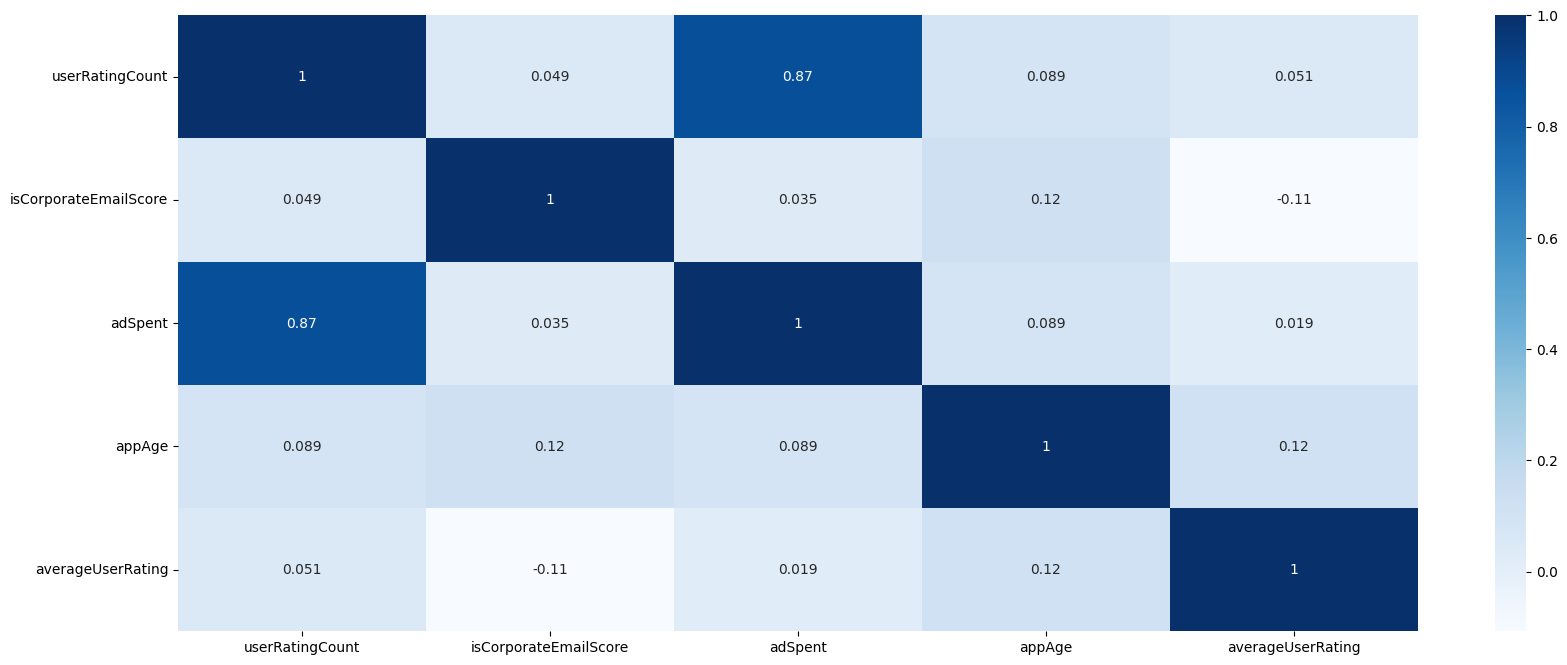

In [25]:
corr = train.select_dtypes(include = ["int64","float64"]).corr()
plt.figure(figsize=(20,8))
var = corr.columns
n = len(var)
pos = dict()
neg = dict()
for i in var:
    pos[i] = list()
    neg[i] = list()

for i in var:
    for j in range(n):
        if i == var[j]: continue
        if corr[i].iloc[j] > 0.7:
            pos[i].append(var[j])
        if corr[i].iloc[j] < -0.7:
            neg[i].append(var[j])

print(pos)
print("\n")
print(neg)
            
sns.heatmap(corr, cmap="Blues",annot=True)

{'ID': [], 'userRatingCount': [], 'isCorporateEmailScore': [], 'adSpent': [], 'appAge': [], 'averageUserRating': []}


{'ID': [], 'userRatingCount': [], 'isCorporateEmailScore': [], 'adSpent': [], 'appAge': [], 'averageUserRating': []}


<Axes: >

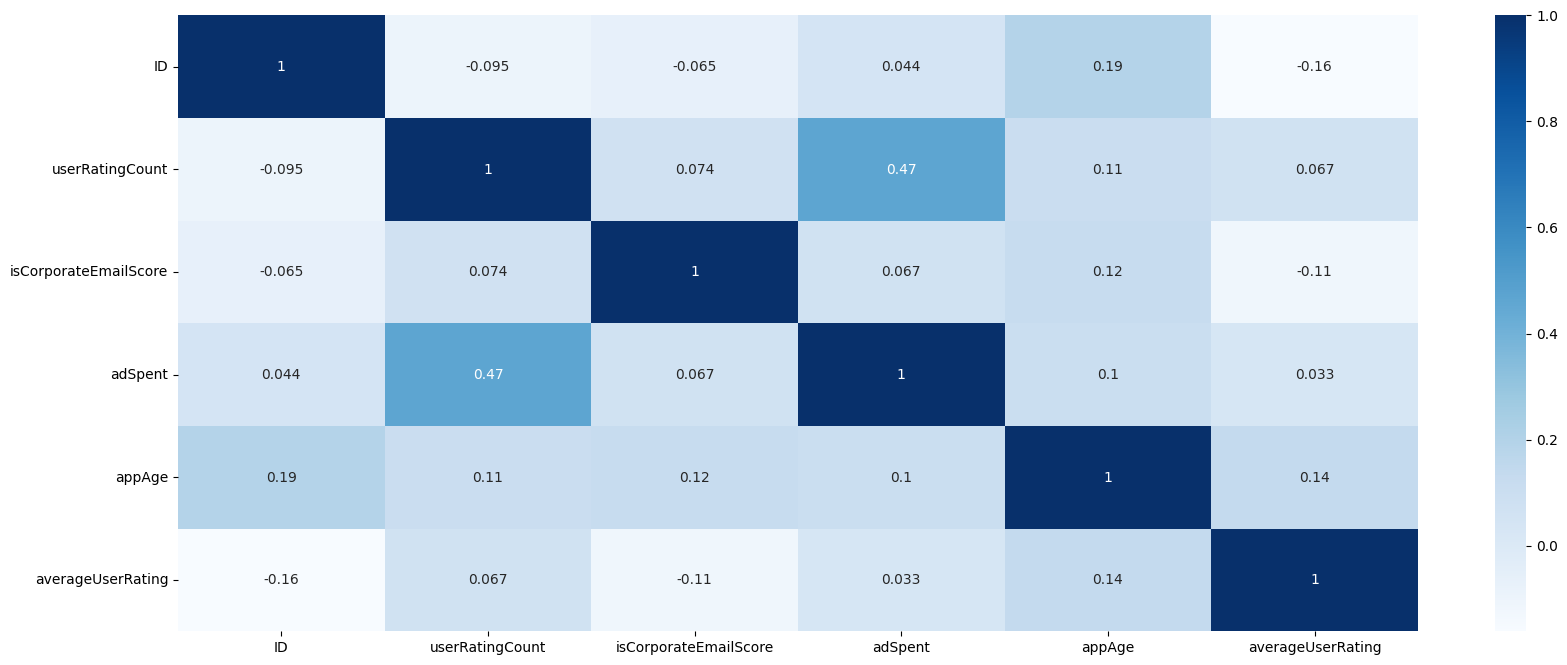

In [26]:
corr = test.select_dtypes(include = ["int64","float64"]).corr()
plt.figure(figsize=(20,8))
var = corr.columns
n = len(var)
pos = dict()
neg = dict()
for i in var:
    pos[i] = list()
    neg[i] = list()

for i in var:
    for j in range(n):
        if i == var[j]: continue
        if corr[i].iloc[j] > 0.7:
            pos[i].append(var[j])
        if corr[i].iloc[j] < -0.7:
            neg[i].append(var[j])

print(pos)
print("\n")
print(neg)
            
sns.heatmap(corr, cmap="Blues",annot=True)

#### Numerik - Kategorikal

In [27]:
import pandas as pd
import numpy as np
from scipy import stats

# Fungsi ANOVA Test
def anova_test(df, cat_col, num_col):
    try:
        groups = [group[num_col].values for name, group in df.groupby(cat_col)]
        f_stat, p_val = stats.f_oneway(*groups)
        return f_stat, p_val
    except:
        return np.nan, np.nan

# Fungsi Eta Squared (Correlation Ratio)
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((measurements - y_total_avg) ** 2)
    if denominator == 0:
        return 0.0
    return np.sqrt(numerator / denominator)

# Misal dataframe kamu bernama train
# 1. Pisahkan kolom kategorikal dan numerik
cat_cols = train.select_dtypes(include=['object', 'bool']).columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns

# 2. Simpan hasil ke list
results = []

for cat in cat_cols:
    for num in num_cols:
        df_temp = train[[cat, num]].dropna()
        if df_temp[cat].nunique() > 1 and df_temp[num].nunique() > 1:
            f_stat, p_val = anova_test(df_temp, cat, num)
            eta = correlation_ratio(df_temp[cat], df_temp[num].values)
            results.append({
                'Categorical': cat,
                'Numerical': num,
                'F-Statistic': round(f_stat, 4),
                'p-value': round(p_val, 4),
                'Eta': round(eta, 4)
            })

# 3. Konversi hasil ke dataframe
result_df = pd.DataFrame(results)
result_df.sort_values(by='Eta', ascending=False, inplace=True)

# Tampilkan hasil
result_df


,Categorical,Numerical,F-Statistic,p-value,Eta
15,downloads,userRatingCount,2656.2201,0.0000,0.9655
17,downloads,adSpent,398.5395,0.0000,0.9397
2,developerCountry,adSpent,16.5678,0.0000,0.6641
0,developerCountry,userRatingCount,35.0434,0.0000,0.6042
19,downloads,averageUserRating,47.6715,0.0000,0.4991
14,primaryGenreName,averageUserRating,19.4330,0.0000,0.3641
11,primaryGenreName,isCorporateEmailScore,18.4849,0.0000,0.3500
1,developerCountry,isCorporateEmailScore,5.5179,0.0000,0.3126
9,countryCode,averageUserRating,4.8696,0.0000,0.3054
3,developerCountry,appAge,4.3319,0.0000,0.2585


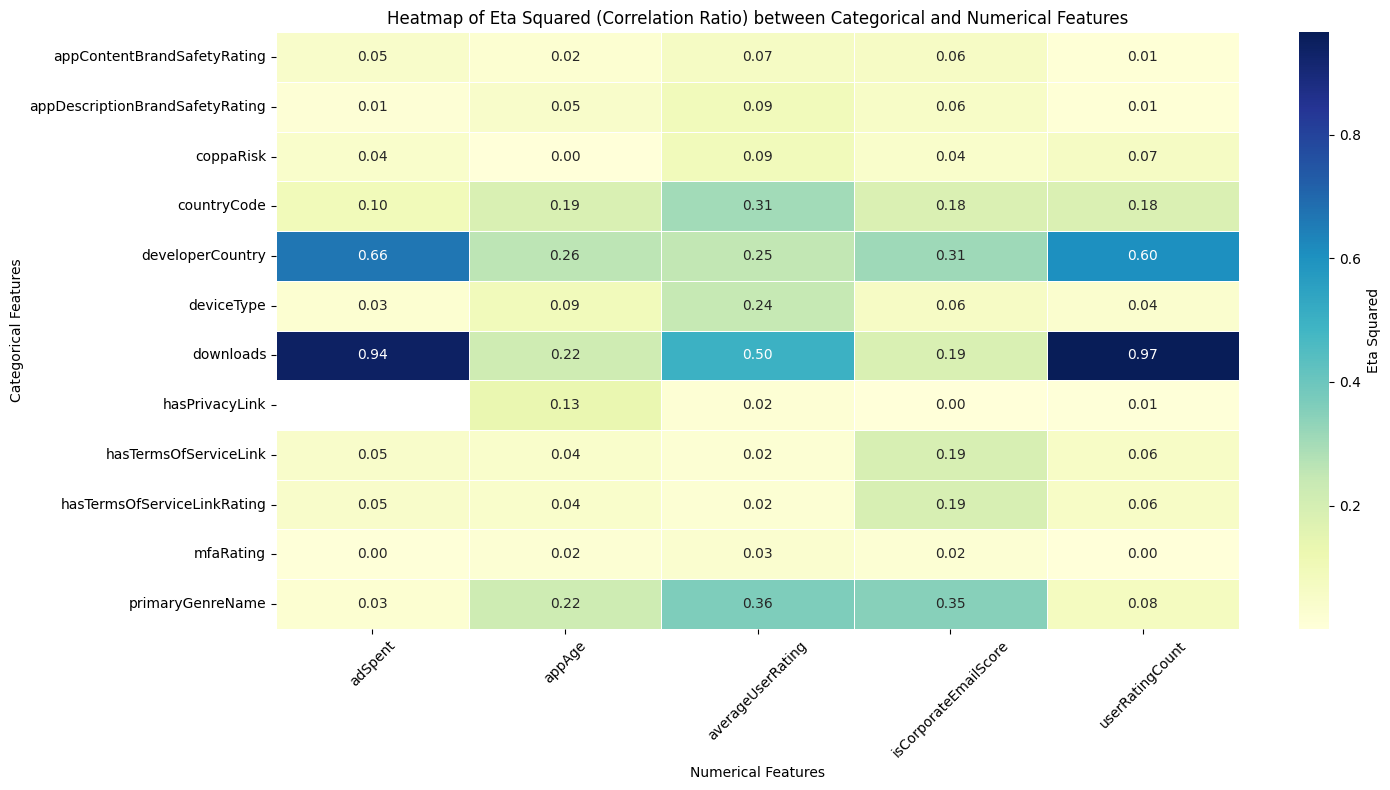

In [28]:

# Buat pivot table agar bisa divisualisasikan sebagai heatmap
pivot_eta = result_df.pivot(index='Categorical', columns='Numerical', values='Eta')

# Plot heatmap
plt.figure(figsize=(15, 8))  # Ukuran heatmap bisa diubah sesuai kebutuhan
sns.heatmap(pivot_eta, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Eta Squared'})

plt.title("Heatmap of Eta Squared (Correlation Ratio) between Categorical and Numerical Features")
plt.ylabel("Categorical Features")
plt.xlabel("Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import numpy as np
from scipy import stats

# Fungsi ANOVA Test
def anova_test(df, cat_col, num_col):
    try:
        groups = [group[num_col].values for name, group in df.groupby(cat_col)]
        f_stat, p_val = stats.f_oneway(*groups)
        return f_stat, p_val
    except:
        return np.nan, np.nan

# Fungsi Eta Squared (Correlation Ratio)
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((measurements - y_total_avg) ** 2)
    if denominator == 0:
        return 0.0
    return np.sqrt(numerator / denominator)

# Misal dataframe kamu bernama train
# 1. Pisahkan kolom kategorikal dan numerik
cat_cols = test.select_dtypes(include=['object', 'bool']).columns
num_cols = test.select_dtypes(include=['int64', 'float64']).columns

# 2. Simpan hasil ke list
results = []

for cat in cat_cols:
    for num in num_cols:
        df_temp = test[[cat, num]].dropna()
        if df_temp[cat].nunique() > 1 and df_temp[num].nunique() > 1:
            f_stat, p_val = anova_test(df_temp, cat, num)
            eta = correlation_ratio(df_temp[cat], df_temp[num].values)
            results.append({
                'Categorical': cat,
                'Numerical': num,
                'F-Statistic': round(f_stat, 4),
                'p-value': round(p_val, 4),
                'Eta': round(eta, 4)
            })

# 3. Konversi hasil ke dataframe
result_df1 = pd.DataFrame(results)
result_df1.sort_values(by='Eta', ascending=False, inplace=True)

# Tampilkan hasil
result_df1


,Categorical,Numerical,F-Statistic,p-value,Eta
19,downloads,userRatingCount,156.0079,0.0000,0.7733
18,downloads,ID,68.7708,0.0000,0.6293
6,countryCode,ID,18.7342,0.0000,0.6099
23,downloads,averageUserRating,28.2805,0.0000,0.5130
3,developerCountry,adSpent,3.2528,0.0000,0.4911
...,...,...,...,...,...
31,hasPrivacyLink,userRatingCount,0.2313,0.6306,0.0093
62,mfaRating,adSpent,0.0242,0.9761,0.0092
41,hasTermsOfServiceLinkRating,ID,0.0264,0.8709,0.0050
35,hasTermsOfServiceLink,ID,0.0264,0.8709,0.0050


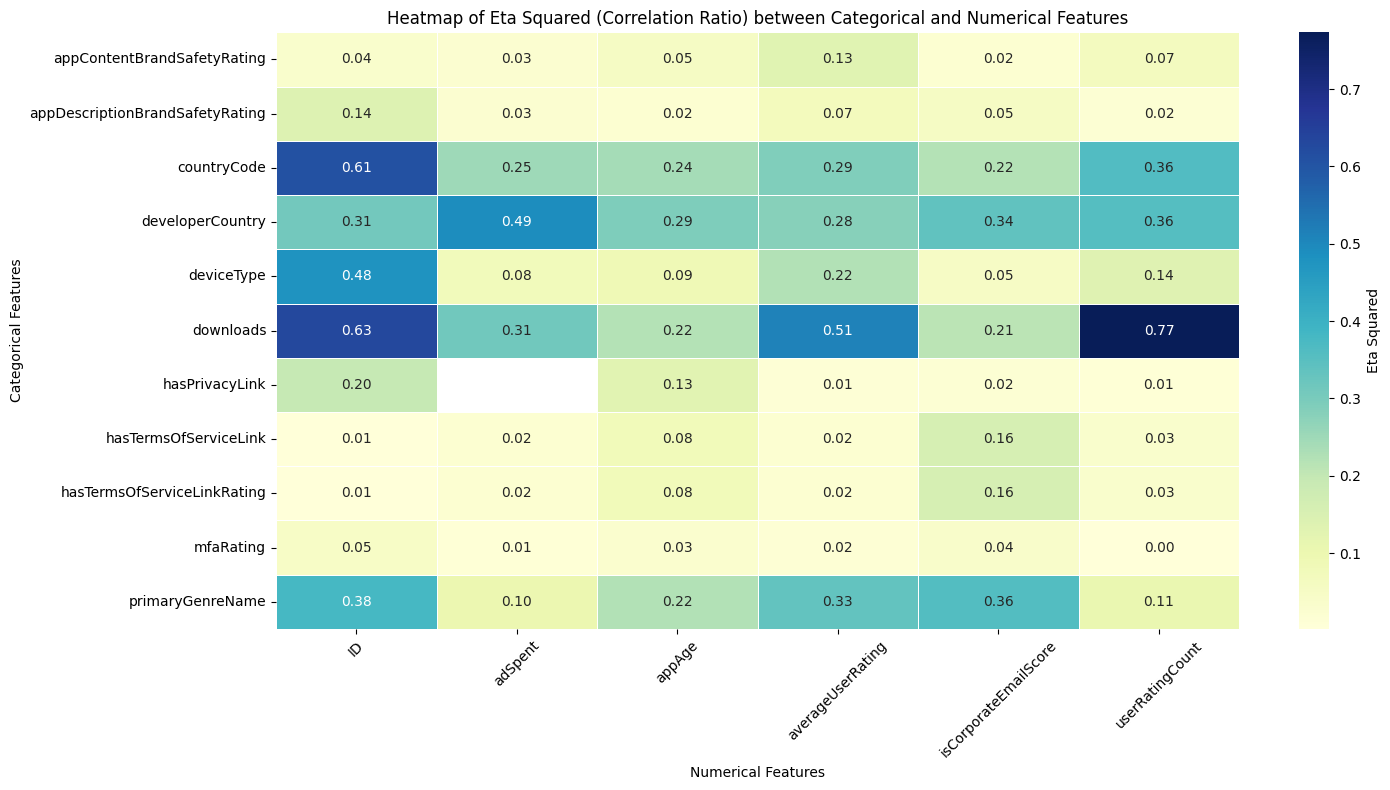

In [30]:

# Buat pivot table agar bisa divisualisasikan sebagai heatmap
pivot_eta = result_df1.pivot(index='Categorical', columns='Numerical', values='Eta')

# Plot heatmap
plt.figure(figsize=(15, 8))  # Ukuran heatmap bisa diubah sesuai kebutuhan
sns.heatmap(pivot_eta, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Eta Squared'})

plt.title("Heatmap of Eta Squared (Correlation Ratio) between Categorical and Numerical Features")
plt.ylabel("Categorical Features")
plt.xlabel("Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = ['countryCode', 'developerCountry', 'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
            'downloads','appContentBrandSafetyRating', 'appDescriptionBrandSafetyRating', 'hasPrivacyLink']

for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        v = cramers_v(test[cat_cols[i]], test[cat_cols[j]])
        if v > 0.7:
            print(f"Cramér’s V antara '{cat_cols[i]}' dan '{cat_cols[j]}' = {v:.2f} → POTENSI pseudo-multikolinearitas")


Cramér’s V antara 'hasTermsOfServiceLink' dan 'hasTermsOfServiceLinkRating' = 1.00 → POTENSI pseudo-multikolinearitas


In [32]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = ['countryCode', 'developerCountry', 'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
            'downloads','appContentBrandSafetyRating', 'appDescriptionBrandSafetyRating', 'hasPrivacyLink']

for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        v = cramers_v(test[cat_cols[i]], test[cat_cols[j]])
        if v > 0.7:
            print(f"Cramér’s V antara '{cat_cols[i]}' dan '{cat_cols[j]}' = {v:.2f} → POTENSI pseudo-multikolinearitas")


Cramér’s V antara 'hasTermsOfServiceLink' dan 'hasTermsOfServiceLinkRating' = 1.00 → POTENSI pseudo-multikolinearitas


#### Kategorikal - Kategorikal 

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Load data (assuming the dataframe was named df_train earlier)
df_train = train.copy()

# Select categorical columns only
categorical_cols = df_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Prepare results
chi2_results = []

# Loop through pairs of categorical columns
for i, col1 in enumerate(categorical_cols):
    for col2 in categorical_cols[i + 1:]:
        # Create contingency table
        contingency_table = pd.crosstab(df_train[col1], df_train[col2])

        # Only compute chi2 if both columns have more than 1 category
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            try:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                chi2_results.append({
                    'Feature 1': col1,
                    'Feature 2': col2,
                    'Chi2 Statistic': chi2,
                    'p-value': p
                })
            except:
                continue

# Convert results to DataFrame and sort by Chi2 Statistic
chi2_df = pd.DataFrame(chi2_results).sort_values(by='Chi2 Statistic', ascending=False).reset_index(drop=True)
chi2_df.head(10)  # Show top 10 results



,Feature 1,Feature 2,Chi2 Statistic,p-value
0,developerCountry,countryCode,18270.917915,1.338840e-162
1,developerCountry,downloads,9140.242061,0.000000e+00
2,countryCode,downloads,7632.659935,0.000000e+00
3,developerCountry,primaryGenreName,5893.646745,1.123794e-14
4,countryCode,primaryGenreName,3882.565494,1.000000e+00
5,countryCode,deviceType,3111.417512,0.000000e+00
6,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,2360.827743,0.000000e+00
7,primaryGenreName,downloads,1912.638911,1.354951e-97
8,downloads,deviceType,1619.591058,1.157789e-272
9,developerCountry,deviceType,1407.972183,1.074758e-98


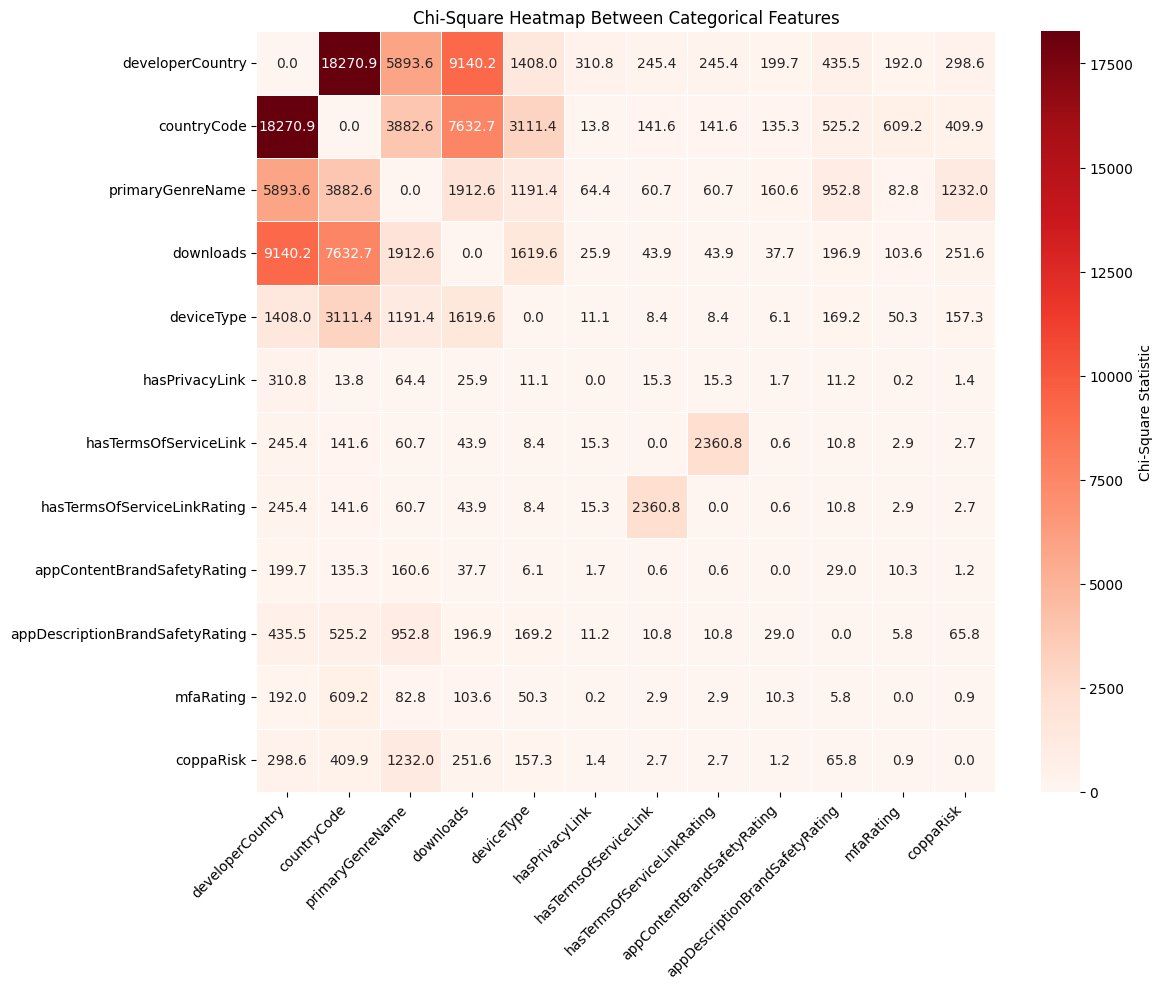

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat matriks simetris dari hasil Chi-Square
chi2_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

# Isi matriks dengan nilai Chi2 Statistic
for _, row in chi2_df.iterrows():
    f1, f2, chi2_val = row['Feature 1'], row['Feature 2'], row['Chi2 Statistic']
    chi2_matrix.loc[f1, f2] = chi2_val
    chi2_matrix.loc[f2, f1] = chi2_val  # Karena chi2 simetris

# Optional: ganti diagonal dengan nol atau NaN
for col in categorical_cols:
    chi2_matrix.loc[col, col] = 0

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(chi2_matrix, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5, cbar_kws={'label': 'Chi-Square Statistic'})

plt.title("Chi-Square Heatmap Between Categorical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Load data (assuming the dataframe was named df_train earlier)
df_train = test.copy()

# Select categorical columns only
categorical_cols = df_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Prepare results
chi2_results = []

# Loop through pairs of categorical columns
for i, col1 in enumerate(categorical_cols):
    for col2 in categorical_cols[i + 1:]:
        # Create contingency table
        contingency_table = pd.crosstab(df_train[col1], df_train[col2])

        # Only compute chi2 if both columns have more than 1 category
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            try:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                chi2_results.append({
                    'Feature 1': col1,
                    'Feature 2': col2,
                    'Chi2 Statistic': chi2,
                    'p-value': p
                })
            except:
                continue

# Convert results to DataFrame and sort by Chi2 Statistic
chi3_df = pd.DataFrame(chi2_results).sort_values(by='Chi2 Statistic', ascending=False).reset_index(drop=True)
chi3_df.head(10)  # Show top 10 results



,Feature 1,Feature 2,Chi2 Statistic,p-value
0,developerCountry,countryCode,12740.630034,6.668938e-223
1,countryCode,downloads,4657.435504,1.248884e-268
2,developerCountry,primaryGenreName,3597.130329,9.992961e-01
3,developerCountry,downloads,2309.272099,1.190868e-25
4,countryCode,primaryGenreName,2094.456532,1.000000e+00
5,countryCode,deviceType,1595.393313,2.229929e-153
6,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,1034.764724,4.986498e-227
7,primaryGenreName,downloads,985.510694,4.002577e-19
8,countryCode,mfaRating,908.793930,5.632822e-97
9,downloads,deviceType,840.781907,3.031042e-127


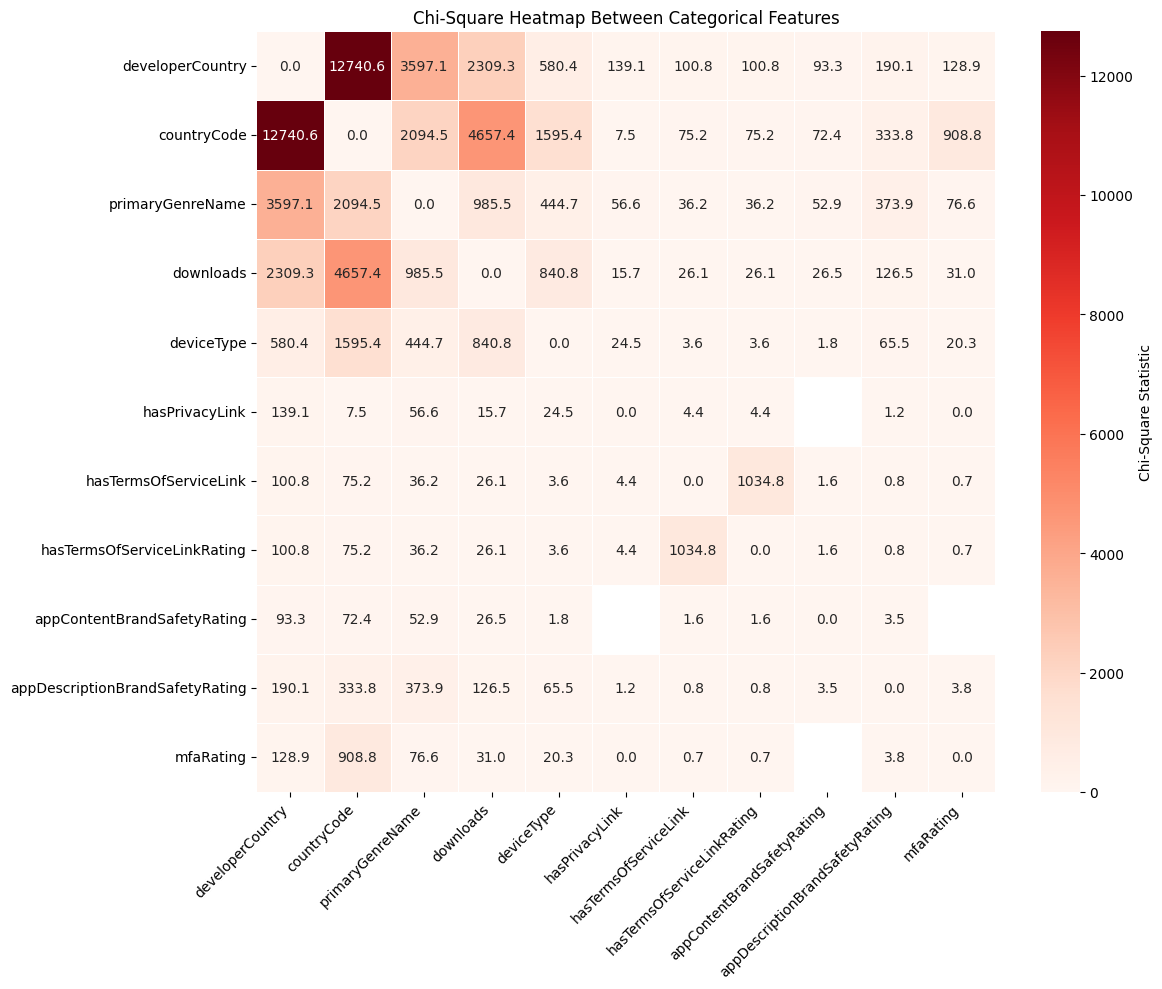

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat matriks simetris dari hasil Chi-Square
chi2_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

# Isi matriks dengan nilai Chi2 Statistic
for _, row in chi3_df.iterrows():
    f1, f2, chi2_val = row['Feature 1'], row['Feature 2'], row['Chi2 Statistic']
    chi2_matrix.loc[f1, f2] = chi2_val
    chi2_matrix.loc[f2, f1] = chi2_val  # Karena chi2 simetris

# Optional: ganti diagonal dengan nol atau NaN
for col in categorical_cols:
    chi2_matrix.loc[col, col] = 0

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(chi2_matrix, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5, cbar_kws={'label': 'Chi-Square Statistic'})

plt.title("Chi-Square Heatmap Between Categorical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

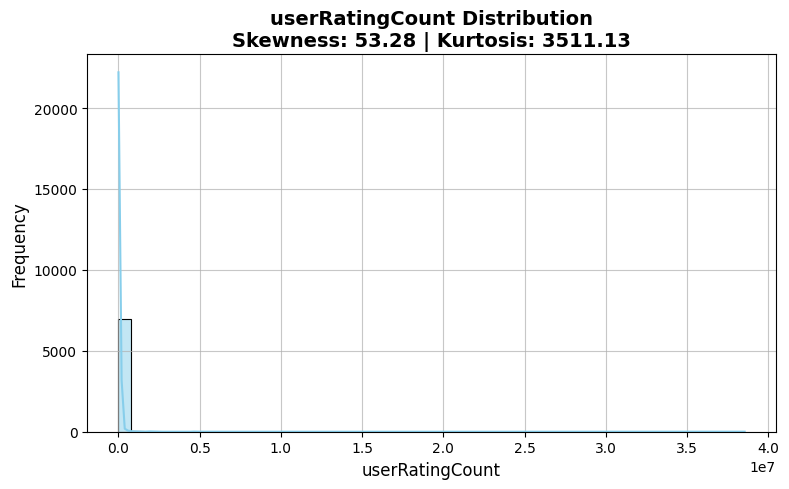

Interpretasi userRatingCount:
➡️ Distribusi sangat condong ke kanan (highly positive skew). Disarankan transformasi: log, sqrt, atau Box-Cox.
📈 Distribusi lebih runcing dari normal (leptokurtic).



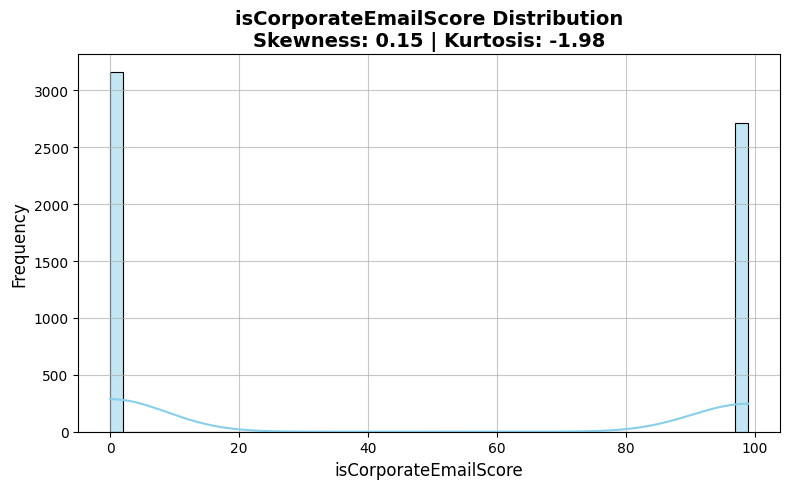

Interpretasi isCorporateEmailScore:
➡️ Distribusi mendekati simetris (Skewness: 0.15)
📉 Distribusi lebih datar dari normal (platykurtic).



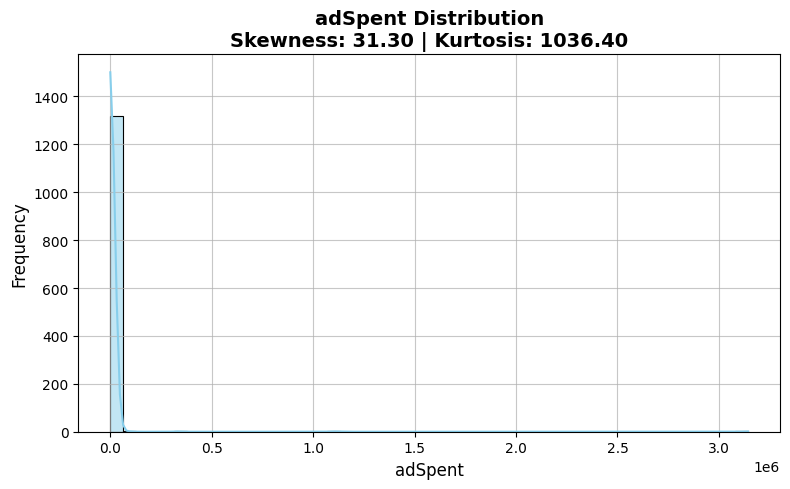

Interpretasi adSpent:
➡️ Distribusi sangat condong ke kanan (highly positive skew). Disarankan transformasi: log, sqrt, atau Box-Cox.
📈 Distribusi lebih runcing dari normal (leptokurtic).



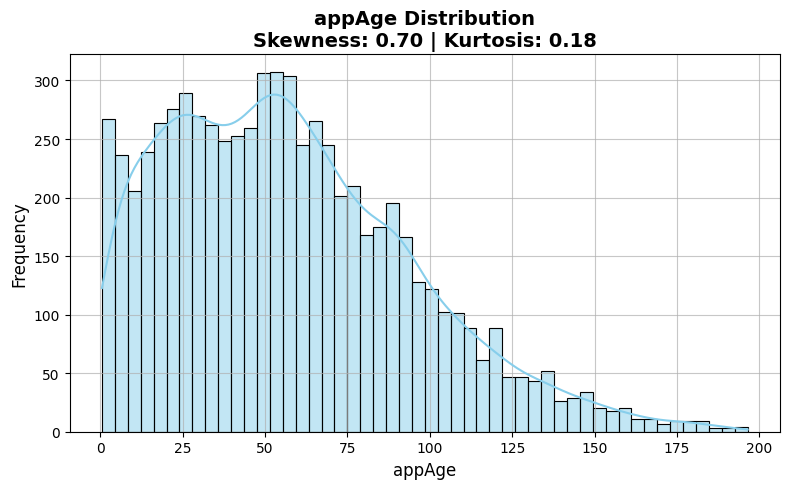

Interpretasi appAge:
➡️ Distribusi agak condong ke kanan (moderate positive skew).
📉 Distribusi lebih datar dari normal (platykurtic).



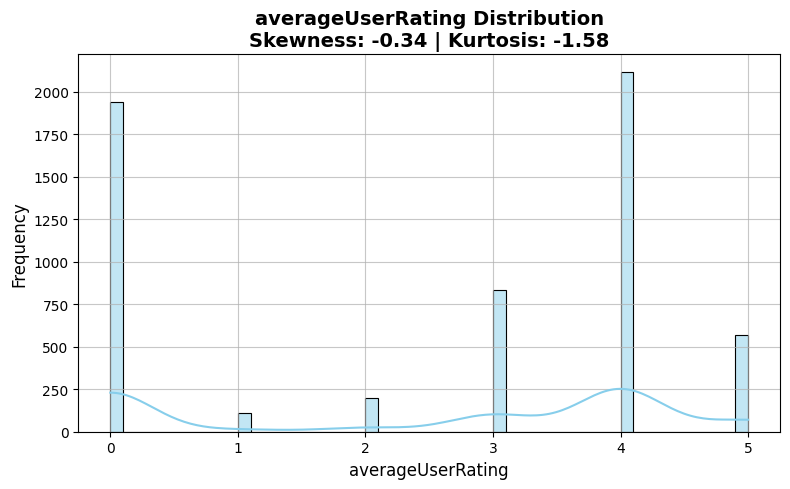

Interpretasi averageUserRating:
➡️ Distribusi mendekati simetris (Skewness: -0.34)
📉 Distribusi lebih datar dari normal (platykurtic).



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil semua kolom numerik dari data train
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns

# Loop untuk menampilkan distribusi tiap kolom
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(train[col], bins=50, kde=True, color='skyblue')
    
    # Hitung skewness dan kurtosis
    skewness = train[col].skew()
    kurtosis = train[col].kurtosis()
    
    # Judul plot
    plt.title(f'{col} Distribution\nSkewness: {skewness:.2f} | Kurtosis: {kurtosis:.2f}',
              fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Interpretasi skewness
    print(f'\033[1mInterpretasi {col}:\033[0m')
    if abs(skewness) < 0.5:
        print(f"➡️ Distribusi mendekati simetris (Skewness: {skewness:.2f})")
    elif skewness > 0.5 and skewness <= 1:
        print(f"➡️ Distribusi agak condong ke kanan (moderate positive skew).")
    elif skewness > 1:
        print(f"➡️ Distribusi sangat condong ke kanan (highly positive skew). Disarankan transformasi: log, sqrt, atau Box-Cox.")
    elif skewness < -0.5 and skewness >= -1:
        print(f"➡️ Distribusi agak condong ke kiri (moderate negative skew).")
    else:
        print(f"➡️ Distribusi sangat condong ke kiri (highly negative skew). Disarankan transformasi: pangkat dua, pangkat tiga, atau mirror+log.")

    # Interpretasi kurtosis
    if kurtosis > 3:
        print(f"📈 Distribusi lebih runcing dari normal (leptokurtic).\n")
    elif kurtosis < 3:
        print(f"📉 Distribusi lebih datar dari normal (platykurtic).\n")
    else:
        print(f"🔍 Distribusi mendekati normal (mesokurtic).\n")


In [38]:
train = train.drop_duplicates()

# Cek kembali
print(f"Jumlah baris setelah menghapus duplikat: {len(train)}")

Jumlah baris setelah menghapus duplikat: 6997


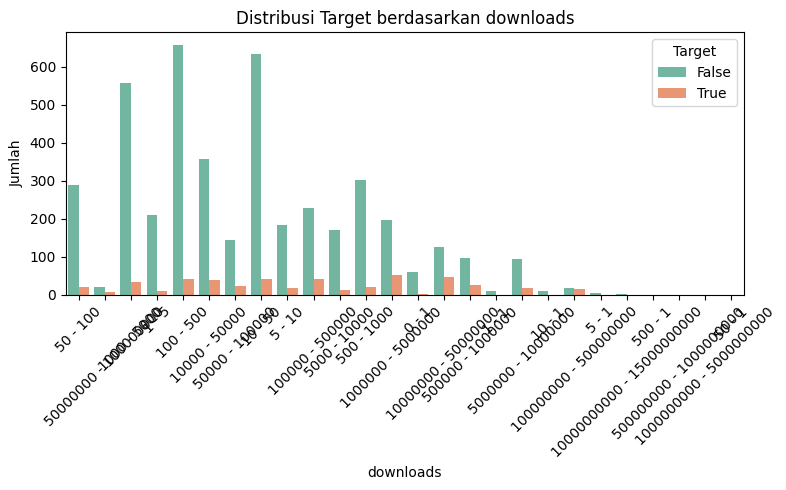

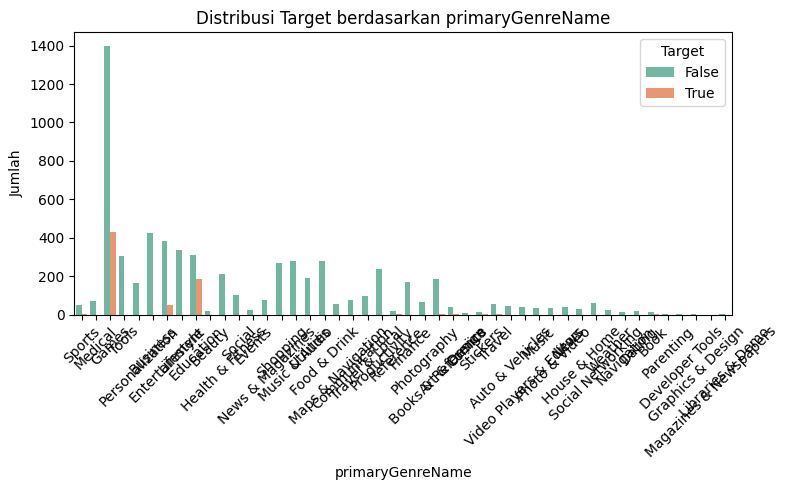

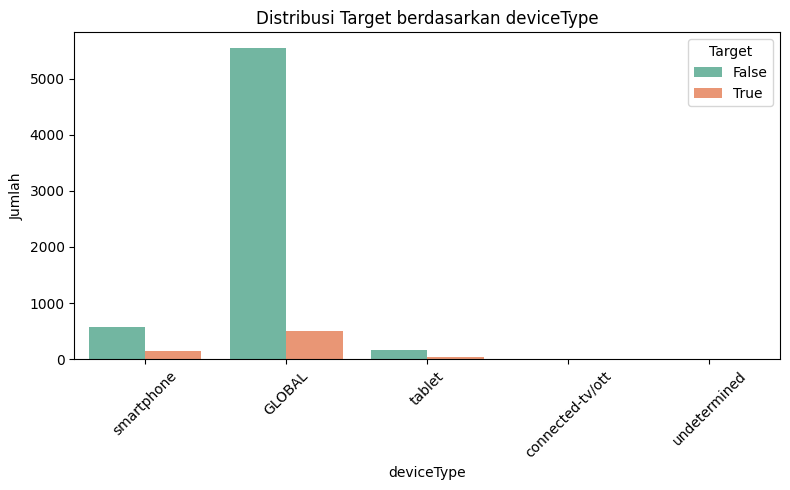

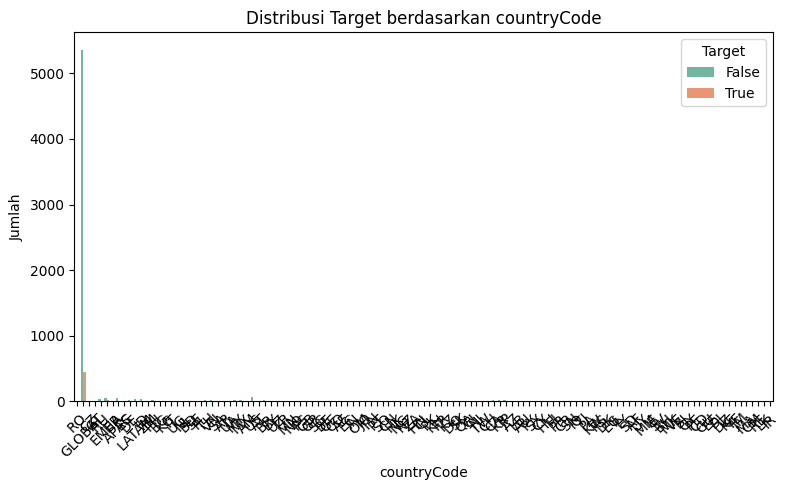

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar fitur kategorikal — ganti ini dengan daftar kolom kategorikal di dataset kamu
categorical_features = ['downloads', 'primaryGenreName','deviceType','countryCode']  # <-- ganti sesuai dataset

# Membuat plot
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=col, hue="coppaRisk", palette='Set2')
    plt.title(f'Distribusi Target berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.legend(title='Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Data Preprocessing

In [40]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['coppaRisk'])
y = train['coppaRisk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
)



In [41]:
X_train = X_train.drop(columns=["hasTermsOfServiceLink", "hasTermsOfServiceLinkRating", "adSpent","appContentBrandSafetyRating","developerCountry","hasPrivacyLink","countryCode"])
X_test = X_test.drop(columns=["hasTermsOfServiceLink", "hasTermsOfServiceLinkRating", "adSpent","appContentBrandSafetyRating","developerCountry","hasPrivacyLink","countryCode"])
test = test.drop(columns=["hasTermsOfServiceLink", "hasTermsOfServiceLinkRating", "adSpent","appContentBrandSafetyRating","developerCountry","hasPrivacyLink","countryCode"])

In [42]:
from sklearn.impute import SimpleImputer
X_train.replace('', np.nan, inplace=True)
X_test.replace('', np.nan, inplace=True)

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols1 = X_test.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_cols1 = X_test.select_dtypes(include=['object']).columns.tolist()

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
# Imputasi untuk kolom numerik
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[numeric_cols1] = numeric_imputer.fit_transform(X_test[numeric_cols1])
X_test[categorical_cols1] = categorical_imputer.fit_transform(X_test[categorical_cols1])
test[numeric_cols1] = numeric_imputer.fit_transform(test[numeric_cols1])
test[categorical_cols1] = categorical_imputer.fit_transform(test[categorical_cols1])
# test[numeric_cols1] = numeric_imputer.fit_transform(test[numeric_cols1])

In [43]:
import pandas as pd
import numpy as np

def parse_download_range(s):
    try:
        s = s.replace(",", "").strip()
        parts = s.split(" - ")
        if len(parts) != 2:
            return np.nan
        low, high = sorted([int(parts[0]), int(parts[1])])  # pastikan low < high
        return (low + high) / 2
    except:
        return np.nan

# X_train['Downloads_numeric'] = X_train['downloads'].apply(parse_download_range)
# # # X_train['Downloads_numeric'] = np.log1p(X_train['Downloads_numeric'])
# X_test['Downloads_numeric'] = X_test['downloads'].apply(parse_download_range)
# # # X_test['Downloads_numeric'] = np.log1p(X_test['Downloads_numeric'])
# test['Downloads_numeric'] = test['downloads'].apply(parse_download_range)
# # # test['Downloads_numeric'] = np.log1p(test['Downloads_numeric'])

In [44]:
X_train.head()

,userRatingCount,primaryGenreName,downloads,deviceType,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating
4823,0.0,Utilities,100 - 500,GLOBAL,0.0,53.100000,0.0,low,low
2620,43.0,Finance,1000 - 5000,GLOBAL,0.0,37.333333,3.0,low,low
125,8.0,Tools,500 - 1000,GLOBAL,0.0,42.833333,4.0,low,low
5125,1183.0,Personalization,500000 - 1000000,smartphone,0.0,4.166667,4.0,low,low
3759,12.0,Travel & Local,100 - 500,GLOBAL,0.0,89.766667,5.0,low,low


In [45]:
def interactions(X_train):
    X_train['genre_device'] = X_train['primaryGenreName'] + "_" + X_train['deviceType']
    X_train['genre_safety'] = X_train['primaryGenreName'] + "_" + X_train['appDescriptionBrandSafetyRating']
    X_train['iscor'] = X_train['isCorporateEmailScore'].astype(str) + "_" + X_train['primaryGenreName'].astype(str)
    
    # X_train['ratio_rating__age'] = X_train['averageUserRating'] / X_train['appAge']
    # X_train['rating_x_age'] = X_train['averageUserRating'] * X_train['appAge']

    X_train['weightedRating'] = (X_train['averageUserRating'] * np.log1p(X_train['userRatingCount'])) / 5
    X_train['deviceType'] = X_train['deviceType'].apply(
        lambda x: 'GLOBAL' if x == 'GLOBAL' else 'others'
    )

    return X_train

def apply_feature_engineering(X: pd.DataFrame) -> pd.DataFrame:
    X = interactions(X)
    return X

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5597 entries, 4823 to 4141
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   userRatingCount                  5597 non-null   float64
 1   primaryGenreName                 5597 non-null   object 
 2   downloads                        5597 non-null   object 
 3   deviceType                       5597 non-null   object 
 4   isCorporateEmailScore            5597 non-null   float64
 5   appAge                           5597 non-null   float64
 6   averageUserRating                5597 non-null   float64
 7   appDescriptionBrandSafetyRating  5597 non-null   object 
 8   mfaRating                        5597 non-null   object 
dtypes: float64(4), object(5)
memory usage: 437.3+ KB


In [47]:
X_train = apply_feature_engineering(X_train)
X_test = apply_feature_engineering(X_test)
test = apply_feature_engineering(test)

In [48]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Clipping menggunakan IQR method
Q1 = X_train['userRatingCount'].quantile(0.25)
Q3 = X_train['userRatingCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
X_train['userRatingCount'] = X_train['userRatingCount'].clip(lower=lower_bound, upper=upper_bound)

Q1 = X_test['userRatingCount'].quantile(0.25)
Q3 = X_test['userRatingCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
X_test['userRatingCount'] = X_test['userRatingCount'].clip(lower=lower_bound, upper=upper_bound)

Q1 = test['userRatingCount'].quantile(0.25)
Q3 = test['userRatingCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test['userRatingCount'] = test['userRatingCount'].clip(lower=lower_bound, upper=upper_bound)

# 2. Transformasi log (tambahkan 1 untuk hindari log(0))
# X_train['userRatingCount'] = np.log1p(X_train['userRatingCount'])
# X_train['appAge'] = np.log1p(X_train['appAge'])

# X_test['userRatingCount'] = np.log1p(X_test['userRatingCount'])
# X_test['appAge'] = np.log1p(X_test['appAge'])

# # 2. Transformasi log (tambahkan 1 untuk hindari log(0))
# test['userRatingCount'] = np.log1p(test['userRatingCount'])
# test['appAge'] = np.log1p(test['appAge'])


In [49]:
#1. Clipping menggunakan IQR method
# Q1 = X_train['rating_x_age'].quantile(0.25)
# Q3 = X_train['rating_x_age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# X_train["rating_x_age"] = X_train["rating_x_age"].clip(lower=lower_bound, upper=upper_bound)

# Q1 = X_test['rating_x_age'].quantile(0.25)
# Q3 = X_test['rating_x_age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# X_test["rating_x_age"] = X_test["rating_x_age"].clip(lower=lower_bound, upper=upper_bound)

# Q1 = test['rating_x_age'].quantile(0.25)
# Q3 = test['rating_x_age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# test["rating_x_age"] = test["rating_x_age"].clip(lower=lower_bound, upper=upper_bound)

# X_train["rating_x_age"] = np.log1p(X_train["rating_x_age"])
# X_test["rating_x_age"] = np.log1p(X_test["rating_x_age"])
# test["rating_x_age"] = np.log1p(test["rating_x_age"])

In [50]:
#1. Clipping menggunakan IQR method
# Q1 = X_train['ratio_rating__age'].quantile(0.25)
# Q3 = X_train['ratio_rating__age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# X_train["ratio_rating__age"] = X_train["ratio_rating__age"].clip(lower=lower_bound, upper=upper_bound)

# Q1 = X_test['ratio_rating__age'].quantile(0.25)
# Q3 = X_test['ratio_rating__age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# X_test["ratio_rating__age"] = X_test["ratio_rating__age"].clip(lower=lower_bound, upper=upper_bound)

# Q1 = test['ratio_rating__age'].quantile(0.25)
# Q3 = test['ratio_rating__age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# test["ratio_rating__age"] = test["ratio_rating__age"].clip(lower=lower_bound, upper=upper_bound)

# X_train["ratio_rating__age"] = np.log1p(X_train["ratio_rating__age"])
# X_test["ratio_rating__age"] = np.log1p(X_test["ratio_rating__age"])
# test["ratio_rating__age"] = np.log1p(test["ratio_rating__age"])

In [51]:
# X_train = X_train.drop(columns=["averageUserRating"])
# X_test = X_test.drop(columns=["averageUserRating"])
# test = test.drop(columns=["averageUserRating"])

# X_train = X_train.drop(columns=["appAge"])
# X_test = X_test.drop(columns=["appAge"])
# test = test.drop(columns=["appAge"])


In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

def auto_transform_features_v2(X_train: pd.DataFrame, 
                                X_val: pd.DataFrame, 
                                X_test: pd.DataFrame, 
                                skew_threshold: float = 1.0, 
                                target_column: str = 'label') -> (pd.DataFrame, pd.DataFrame, pd.DataFrame):
    
    transformer_dict = {}

    for col in X_train.columns:
        if col != target_column and np.issubdtype(X_train[col].dtype, np.number):
            # Handle missing values
            X_train[col].fillna(0, inplace=True)
            X_val[col].fillna(0, inplace=True)
            X_test[col].fillna(0, inplace=True)
            
            # Compute skewness
            skewness = X_train[col].skew()
            if abs(skewness) > skew_threshold:
                if skewness > 0:
                    X_train[col] = np.log1p(X_train[col].clip(lower=0))
                    X_val[col] = np.log1p(X_val[col].clip(lower=0))
                    X_test[col] = np.log1p(X_test[col].clip(lower=0))
                    transformer_dict[col] = 'log1p'
                else:
                    if X_train[col].var() > 0:
                        transformer = PowerTransformer(method='yeo-johnson')
                        X_train[col] = pd.Series(transformer.fit_transform(X_train[col].values.reshape(-1, 1)).flatten(), index=X_train.index)
                        X_val[col] = pd.Series(transformer.transform(X_val[col].values.reshape(-1, 1)).flatten(), index=X_val.index)
                        X_test[col] = pd.Series(transformer.transform(X_test[col].values.reshape(-1, 1)).flatten(), index=X_test.index)
                        transformer_dict[col] = transformer
                    else:
                        print(f"Skipping column {col} due to zero variance.")

    return X_train, X_val, X_test



X_train, X_test, test = auto_transform_features_v2(X_train.copy(), X_test.copy(),test.copy())

# Modeling

In [53]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class Weights: {class_weight_dict}")


Class Weights: {0: 0.5552579365079365, 1: 5.024236983842011}


In [54]:
# import numpy as np
# import optuna
# import catboost as cb
# from sklearn.metrics import f1_score
# from sklearn.model_selection import train_test_split

# train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

# def objective(trial):
#     cat_features = [
#     'developerCountry',
#     'primaryGenreName',
#     'downloads',
#     'deviceType',
#     'appDescriptionBrandSafetyRating',
#     'mfaRating'
#     ]
#     # Define hyperparameters to tune.
#     param = {
#         "iterations": trial.suggest_int("iterations", 500, 2000),
#         "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
#         "depth": trial.suggest_int("depth", 4, 10),
#         "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 1, 10),
#         "random_strength": trial.suggest_uniform("random_strength", 1, 10),
#         "loss_function": "Logloss",
#         "eval_metric": "F1",  # atau "Recall" tergantung tujuan
#         "verbose": 0
#     }
    

#     # Initialize and train CatBoostClassifier.
#     gbm = cb.CatBoostClassifier(**param,auto_class_weights='Balanced',)
#     gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, cat_features=cat_features)

#     # Predict and calculate F1 score.
#     preds = gbm.predict(valid_x)
#     f1 = f1_score(valid_y, preds, average='macro')  # 'macro' calculates F1 unbiased by class imbalance.
#     return f1

# if __name__ == "__main__":
#     # Create a study object and optimize the objective function.
#     print("CatBoostClassifier")
#     study = optuna.create_study(direction="maximize")
#     study.optimize(objective, n_trials=150)  # Specify the number of trials or a timeout.
    
#     print("Number of finished trials CatBoostClassifier: {}".format(len(study.trials)))
#     print("Best trial:")
#     trial = study.best_trial
#     print("  Value: {:.2f}".format(trial.value))
#     print("  Params: ")
#     for key, value in trial.params.items():
#         print("    {}: {}".format(key, value))
        
#     # Hyperparameter importance
#     importance = optuna.importance.get_param_importances(study)
#     print("Hyperparameter importance: ", importance)


In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5597 entries, 4823 to 4141
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   userRatingCount                  5597 non-null   float64
 1   primaryGenreName                 5597 non-null   object 
 2   downloads                        5597 non-null   object 
 3   deviceType                       5597 non-null   object 
 4   isCorporateEmailScore            5597 non-null   float64
 5   appAge                           5597 non-null   float64
 6   averageUserRating                5597 non-null   float64
 7   appDescriptionBrandSafetyRating  5597 non-null   object 
 8   mfaRating                        5597 non-null   object 
 9   genre_device                     5597 non-null   object 
 10  genre_safety                     5597 non-null   object 
 11  iscor                            5597 non-null   object 
 12  weightedRating        

0:	test: 0.8406911	best: 0.8406911 (0)	total: 385ms	remaining: 3m 12s
50:	test: 0.8990695	best: 0.8995687 (41)	total: 8.8s	remaining: 1m 17s
100:	test: 0.9035195	best: 0.9065604 (78)	total: 17s	remaining: 1m 7s
150:	test: 0.9006955	best: 0.9065604 (78)	total: 25s	remaining: 57.8s
200:	test: 0.9037050	best: 0.9065604 (78)	total: 33s	remaining: 49s
250:	test: 0.9020847	best: 0.9065604 (78)	total: 40.5s	remaining: 40.2s
300:	test: 0.9006384	best: 0.9065604 (78)	total: 48.2s	remaining: 31.9s
350:	test: 0.8998853	best: 0.9065604 (78)	total: 56.2s	remaining: 23.9s
400:	test: 0.8980083	best: 0.9065604 (78)	total: 1m 4s	remaining: 15.9s
450:	test: 0.8975576	best: 0.9065604 (78)	total: 1m 11s	remaining: 7.75s
499:	test: 0.8968787	best: 0.9065604 (78)	total: 1m 17s	remaining: 0us

bestTest = 0.906560398
bestIteration = 78

Shrink model to first 79 iterations.
=== Classification Report (CatBoost - Before SMOTE) ===
              precision    recall  f1-score   support

       False       0.99    

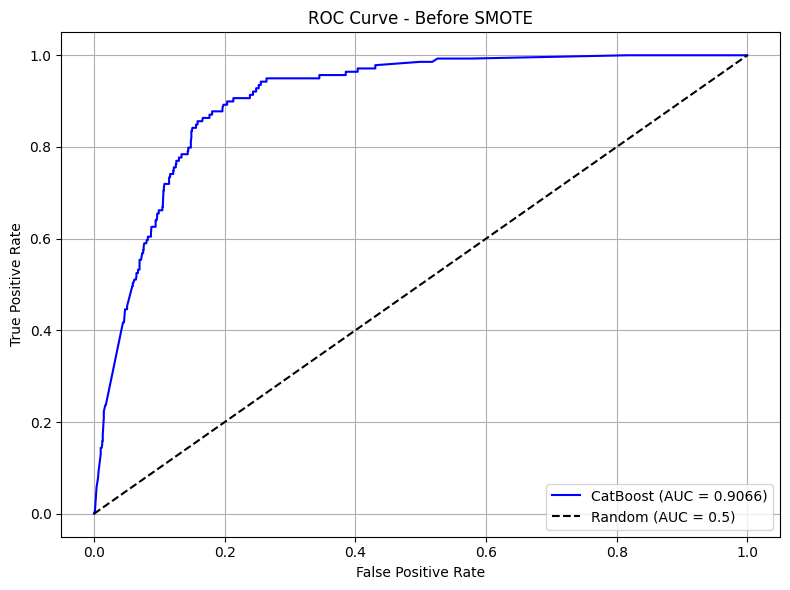


🔍 Top 10 Feature Importance:
                            Feature  Importance
1                  primaryGenreName   42.589888
10                     genre_safety   29.211199
11                            iscor   15.438699
12                   weightedRating    4.437091
5                            appAge    2.504716
9                      genre_device    2.089088
7   appDescriptionBrandSafetyRating    1.521012
0                   userRatingCount    0.914984
2                         downloads    0.669676
6                 averageUserRating    0.346417


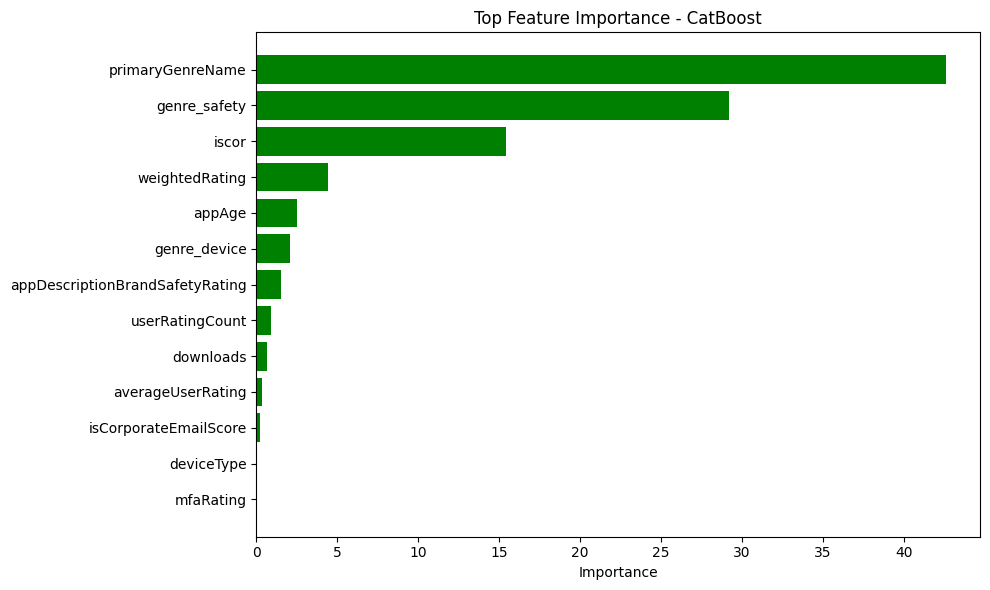

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Daftar fitur kategorikal
cat_features = [
    # 'countryCode',
    'primaryGenreName',
    'downloads',
    'deviceType',
    'appDescriptionBrandSafetyRating',
    'mfaRating',
    'genre_device',
    'genre_safety',
    'iscor',
]
# [I 2025-04-18 09:46:20,155] Trial 144 finished with value: 0.9054992326519435 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.038443271304354515, 'depth': 9, 'l2_leaf_reg': 3, 'random_strength': 3.1244167897512546e-06, 'border_count': 36, 'grow_policy': 'Lossguide', 'subsample': 0.6905170723090944}. Best is trial 144 with value: 0.9054992326519435.
# [I 2025-04-18 09:47:33,484] Trial 152 finished with value: 0.905795902532534 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.03359101812662808, 'depth': 10, 'l2_leaf_reg': 4, 'random_strength': 4.021667422239279e-05, 'border_count': 40, 'grow_policy': 'Lossguide', 'subsample': 0.6281935933158131}. Best is trial 152 with value: 0.905795902532534.
# [I 2025-04-18 09:50:38,668] Trial 172 finished with value: 0.9071366221852019 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.03164067519042084, 'depth': 10, 'l2_leaf_reg': 4, 'random_strength': 6.574940366297763e-06, 'border_count': 36, 'grow_policy': 'Lossguide', 'subsample': 0.6168892917390454}. Best is trial 172 with value: 0.9071366221852019.
# [I 2025-04-18 09:50:54,424] Trial 174 finished with value: 0.9040929033141449 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.0342174739254404, 'depth': 10, 'l2_leaf_reg': 5, 'random_strength': 8.711674364271729e-06, 'border_count': 36, 'grow_policy': 'Lossguide', 'subsample': 0.6287793410400394}. Best is trial 172 with value: 0.9071366221852019.
# [I 2025-04-18 09:51:31,021] Trial 178 finished with value: 0.905159773846268 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.02953811960842584, 'depth': 10, 'l2_leaf_reg': 3, 'random_strength': 1.834896712403984e-05, 'border_count': 43, 'grow_policy': 'Lossguide', 'subsample': 0.6205000665716732}. Best is trial 172 with value: 0.9071366221852019.
# [I 2025-04-18 10:55:50,353] Trial 515 finished with value: 0.9044637406648828 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.02586180743892376, 'depth': 10, 'l2_leaf_reg': 1, 'random_strength': 5.8230660847065055e-06, 'border_count': 32, 'grow_policy': 'Lossguide', 'subsample': 0.7832435446707663}. Best is trial 180 with value: 0.9078469183416153.
# [I 2025-04-18 10:56:00,348] Trial 516 finished with value: 0.9079496117618197 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.02884194381136804, 'depth': 10, 'l2_leaf_reg': 2, 'random_strength': 4.213219956615579e-06, 'border_count': 34, 'grow_policy': 'Lossguide', 'subsample': 0.7619383940741274}. Best is trial 516 with value: 0.9079496117618197.

# # 0.9045 & K-fold 0.8903
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
#   'learning_rate': 0.02586180743892376,
#   'depth': 10,
#   'l2_leaf_reg': 1,
#   'random_strength': 5.8230660847065055e-06,
#   'border_count': 32,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.7832435446707663
# }

# # 0.9055 & K-fold 0.8894
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
#   'learning_rate': 0.038443271304354515,
#   'depth': 9,
#   'l2_leaf_reg': 3,
#   'random_strength': 3.1244167897512546e-06,
#   'border_count': 36,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.6905170723090944
# }

# # 0.9058 & K-fold 0.8903
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
#   'learning_rate': 0.03359101812662808,
#   'depth': 10,
#   'l2_leaf_reg': 4,
#   'random_strength': 4.021667422239279e-05,
#   'border_count': 40,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.6281935933158131
# }

## 0.9071 & K-fold 0.8888
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
#   'learning_rate': 0.03164067519042084,
#   'depth': 10,
#   'l2_leaf_reg': 4,
#   'random_strength': 6.574940366297763e-06,
#   'border_count': 36,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.6168892917390454
# }

# 0.9079 & K-fold 0.8921
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
# #   'learning_rate': 0.02884194381136804,
#   'depth': 10,
#   'l2_leaf_reg': 2,
#   'random_strength': 4.213219956615579e-06,
#   'border_count': 34,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.7619383940741274
# }

# 0.9066 & K-fold 0.8910
cat_params = {
  'bootstrap_type': 'Bernoulli',
  'learning_rate': 0.015735421307249614,
  'depth': 10,
  'l2_leaf_reg': 4,
  'random_strength': 2.9291290971442743e-06,
  'border_count': 153,
  'grow_policy': 'Lossguide'
}

# Inisialisasi & training CatBoost
model = CatBoostClassifier(
    iterations=500,
    eval_metric='AUC',
    verbose=50,
    auto_class_weights='Balanced',
    use_best_model=True,
    random_seed=42,
    **cat_params
)

model.fit(X_train, y_train, cat_features=cat_features,eval_set=(X_test,y_test))

# Prediksi & Laporan Klasifikasi
y_pred = model.predict(X_test)
print("=== Classification Report (CatBoost - Before SMOTE) ===")
print(classification_report(y_test, y_pred))

# ROC AUC Score
y_scores = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_scores)
print(f"\n📈 AUC Score (CatBoost - Before SMOTE): {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"CatBoost (AUC = {auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Before SMOTE")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# FEATURE IMPORTANCE
importances = model.get_feature_importance(Pool(X_train, label=y_train, cat_features=cat_features))
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

print("\n🔍 Top 10 Feature Importance:")
print(importance_df.head(10))

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="green")
plt.gca().invert_yaxis()
plt.title("Top Feature Importance - CatBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Fold 1 AUC: 0.8899
Fold 2 AUC: 0.8831
Fold 3 AUC: 0.8813
Fold 4 AUC: 0.8973
Fold 5 AUC: 0.9035


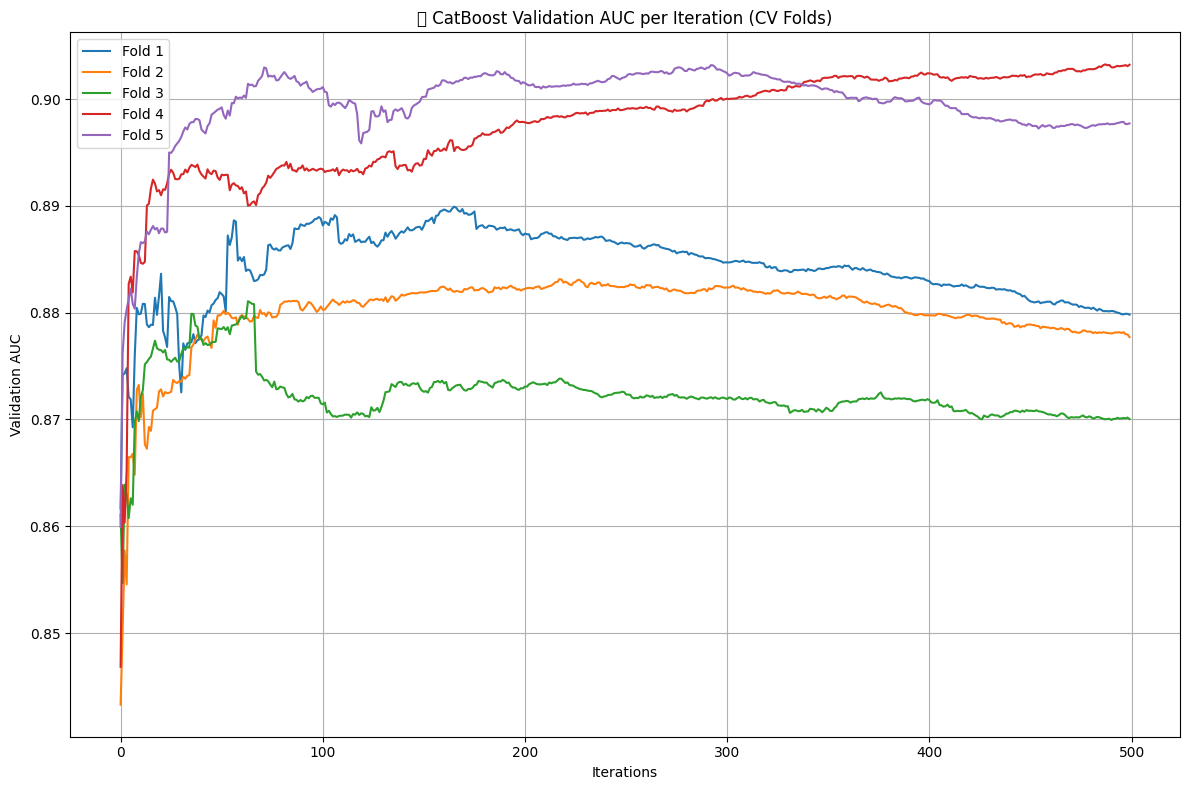


🔁 Mean AUC CV: 0.8910


In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier, Pool

# Hyperparameter model
cat_params = {
    'iterations': 500,
    'eval_metric': 'AUC',
    'loss_function': 'Logloss',
    'verbose': False,
    'random_seed': 42,
    'use_best_model': False
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

plt.figure(figsize=(12, 8))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # model = CatBoostClassifier(**cat_params)
    
    model.fit(
        X_tr, y_tr,
        eval_set=(X_val, y_val),
        cat_features=cat_features,
        verbose=False
    )

    # Prediksi dan simpan AUC
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_val_pred_proba)
    auc_scores.append(auc)
    print(f"Fold {fold+1} AUC: {auc:.4f}")

    # Ambil learning curve (evals_result_)
    results = model.evals_result_
    eval_auc = results['validation']['AUC']
    plt.plot(eval_auc, label=f'Fold {fold+1}')

# Plot learning curve
plt.title("📈 CatBoost Validation AUC per Iteration (CV Folds)")
plt.xlabel("Iterations")
plt.ylabel("Validation AUC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\n🔁 Mean AUC CV: {np.mean(auc_scores):.4f}")

In [58]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score

# params_grid = {
#     'depth': range(3, 11),  # dari 3 sampai 10 (ukuran pohon, kontrol overfitting)
#     'learning_rate': np.linspace(0.01, 0.15, 10),  # 10 titik antara 0.01 sampai 0.15
#     'l2_leaf_reg': range(1, 11),  # regularisasi dari 1 sampai 10
# }

# best_auc = 0
# best_params = None
# cat_features = [
#     # 'countryCode',
#     'primaryGenreName',
#     'downloads',
#     'deviceType',
#     'appDescriptionBrandSafetyRating',
#     'mfaRating',
#     'genre_device',
#     'genre_safety',
#     'iscor',
# ]

# for depth in params_grid['depth']:
#     for lr in params_grid['learning_rate']:
#         for reg in params_grid['l2_leaf_reg']:
#             auc_scores = []
#             skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#             for train_idx, val_idx in skf.split(X_train, y_train):
#                 X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
#                 y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

#                 model = CatBoostClassifier(
#                     iterations=500,
#                     depth=depth,
#                     learning_rate=lr,
#                     l2_leaf_reg=reg,
#                     auto_class_weights='Balanced',
#                     eval_metric='AUC',
#                     cat_features=cat_features,
#                     verbose=0,
#                     use_best_model=True,
#                     random_seed=42
#                 )

#                 model.fit(X_tr, y_tr, eval_set=(X_val, y_val))
#                 preds = model.predict_proba(X_val)[:, 1]
#                 auc = roc_auc_score(y_val, preds)
#                 auc_scores.append(auc)

#             mean_auc = sum(auc_scores) / len(auc_scores)
#             print(f"depth={depth}, lr={lr}, reg={reg} → AUC: {mean_auc:.4f}")
#             if mean_auc > best_auc:
#                 best_auc = mean_auc
#                 best_params = {'depth': depth, 'learning_rate': lr, 'l2_leaf_reg': reg}

# print("\nBest Params:", best_params)
# print("Best AUC:", best_auc)


In [59]:
# stopper

In [60]:
test.drop(columns='ID', inplace=True)

In [61]:
submission = pd.read_csv('submission_format.csv')  # Pastikan ada file submission_format.csv
submission['coppaRisk'] = model.predict_proba(test)[:, 1]

# Save the submission file
submission.to_csv('submission_90666.csv', index=False)

# Check the submission file
submission.head(20)


,ID,coppaRisk
0,2807,0.032299
1,1742,0.548330
2,806,0.825319
3,2635,0.140968
4,9047,0.019759
5,3048,0.030092
6,4691,0.852355
7,1346,0.592632
8,7045,0.021638
9,958,0.847154


In [62]:
stopper

NameError: name 'stopper' is not defined

In [ ]:
submission["coppaRisk"].mean()

0.2723431816882284

In [ ]:
submission128957 = pd.read_csv('submission12.csv')  
submission132a = pd.read_csv('submission (1).csv')  
submissionk894 = pd.read_csv('ssubmission.csv')  
submissions = pd.read_csv('submissions.csv')  

In [ ]:
submission128957["coppaRisk"].mean()

0.27601442603007126

In [ ]:
submissionk894["coppaRisk"].mean()

0.29288965038444736

In [ ]:
submission132a["coppaRisk"].mean()

0.3192849741761422

In [ ]:
submissions["coppaRisk"].mean()

0.2696254163389157

In [ ]:
# submission['coppaRisk'].corr(submission12['coppaRisk'])
# submission['coppaRisk'].corr(submission132['coppaRisk'])
# submissionk['coppaRisk'].corr(submission12['coppaRisk'])
submission['coppaRisk'].corr(submission128957['coppaRisk'])

0.9863419178793974

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X_encoded = X_train.copy()
for col in X_encoded.select_dtypes(include='object'):
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

mi = mutual_info_classif(X_encoded, y_encoded, discrete_features='auto')
mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi})
print(mi_df.sort_values('MI Score', ascending=False))


                            Feature  MI Score
11                            iscor  0.097476
10                     genre_safety  0.096468
1                  primaryGenreName  0.092344
9                      genre_device  0.089814
12                   weightedRating  0.021255
0                   userRatingCount  0.013246
3                        deviceType  0.010184
6                 averageUserRating  0.008926
2                         downloads  0.007723
4             isCorporateEmailScore  0.007626
7   appDescriptionBrandSafetyRating  0.006677
5                            appAge  0.001258
8                         mfaRating  0.000000


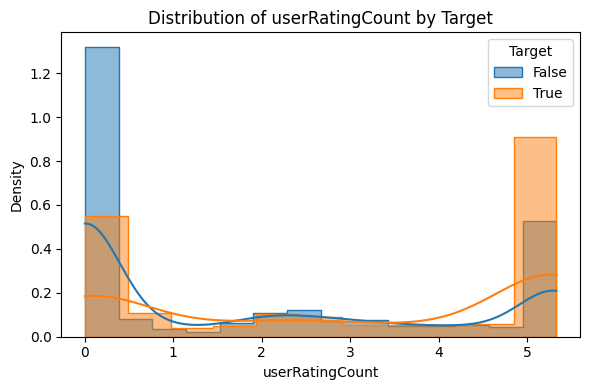

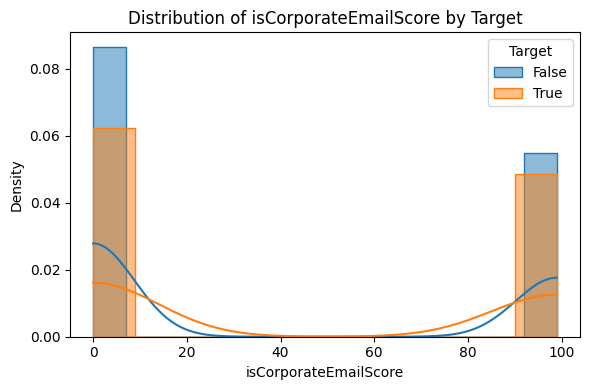

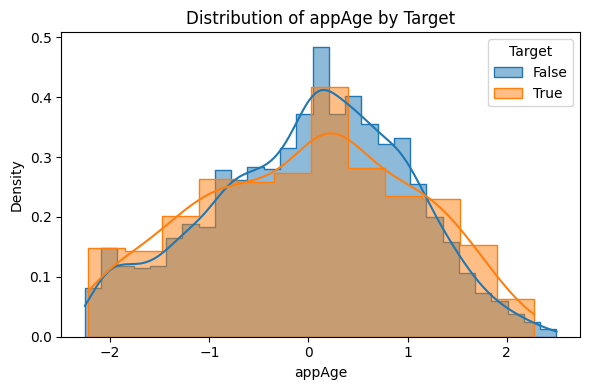

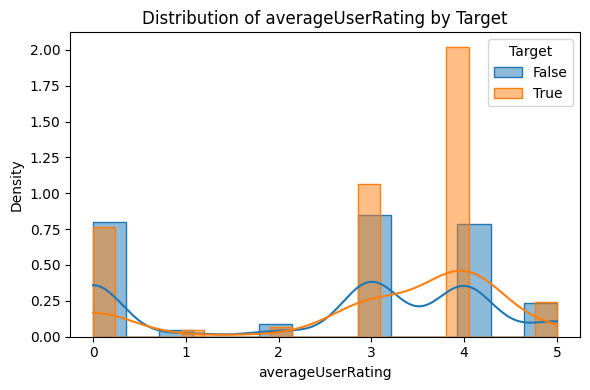

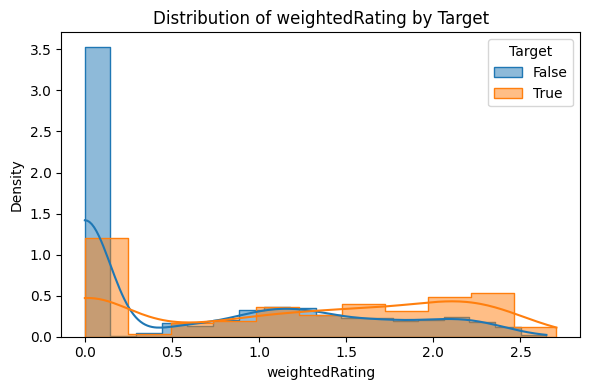

In [ ]:
for col in X_train.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(6,4))
    for label in y_train.unique():
        sns.histplot(X_train[y_train == label][col], label=str(label), kde=True, stat="density", element="step")
    plt.title(f'Distribution of {col} by Target')
    plt.legend(title="Target")
    plt.tight_layout()
    plt.show()


In [ ]:
test.isnull().sum()

userRatingCount                    0
primaryGenreName                   0
downloads                          0
deviceType                         0
isCorporateEmailScore              0
appAge                             0
averageUserRating                  0
appDescriptionBrandSafetyRating    0
mfaRating                          0
genre_device                       0
genre_safety                       0
iscor                              0
weightedRating                     0
dtype: int64

# Coret2an

In [ ]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

low_card = ['deviceType', 'appDescriptionBrandSafetyRating']
target_encode = ['developerCountry', 'primaryGenreName', 'downloads', 'genre_device', 'country_genre', 'genre_safety']



from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

def encode_features_mix(X_train, y_train, X_valid, X_test):
    X_train_enc = X_train.copy()
    X_valid_enc = X_valid.copy()
    X_test_enc = X_test.copy()

    for col in X_train.columns:
        n_unique = X_train[col].nunique()

        if X_train[col].dtype == 'object' or isinstance(X_train[col].dtype, pd.CategoricalDtype):
            if n_unique <= 10:
                oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
                X_train_enc[col] = oe.fit_transform(X_train[[col]])
                X_valid_enc[col] = oe.transform(X_valid[[col]])
                X_test_enc[col] = oe.transform(X_test[[col]])

            elif n_unique <= 100:
                te = TargetEncoder(cols=[col],min_samples_leaf=10)
                X_train_enc[col] = te.fit_transform(X_train[col], y_train)
                X_valid_enc[col] = te.transform(X_valid[col]).fillna(y_train.mean())
                X_test_enc[col] = te.transform(X_test[col]).fillna(y_train.mean())

            else:
                freq_map = X_train[col].value_counts()
                X_train_enc[col + '_freq'] = X_train[col].map(freq_map)
                X_valid_enc[col + '_freq'] = X_valid[col].map(freq_map).fillna(0)
                X_test_enc[col + '_freq'] = X_test[col].map(freq_map).fillna(0)

                X_train_enc.drop(columns=[col], inplace=True)
                X_valid_enc.drop(columns=[col], inplace=True)
                X_test_enc.drop(columns=[col], inplace=True)

    return X_train_enc, X_valid_enc, X_test_enc



X_train,X_test,test=encode_features_mix(X_train,y_train,X_test,test)

In [ ]:
test.isnull().sum()

userRatingCount                    0
primaryGenreName                   0
downloads                          0
deviceType                         0
isCorporateEmailScore              0
appAge                             0
averageUserRating                  0
appDescriptionBrandSafetyRating    0
mfaRating                          0
iscor                              0
weightedRating                     0
genre_device_freq                  0
genre_safety_freq                  0
dtype: int64

In [ ]:
def compute_scale_pos_weight(y):
    neg = (y == 0).sum()
    pos = (y == 1).sum()
    return neg / pos
scale_pos_weight=compute_scale_pos_weight(y_train)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class Weights: {class_weight_dict}")


Class Weights: {0: 0.5552579365079365, 1: 5.024236983842011}


In [ ]:
sample_weights = [class_weight_dict[label] for label in y_train]

In [ ]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, classification_report

# ============================
# 🔹 Cek jumlah kelas
# ============================
num_classes = len(np.unique(y_train))
print(f"Jumlah kelas: {num_classes}")

# ============================
# 🔹 Hitung class weights
# ============================
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# ============================
# 🔹 Buat sample weights
# ============================
sample_weights = np.array([class_weight_dict[label] for label in y_train])

# ============================
# 🔹 Parameter yang diberikan
# ============================
xgb_params = {
    'gamma': 0.38240298106921918,
    'lambda': 4,
    'alpha': 5,
    'learning_rate': 0.010760689966283828,
    'max_depth': 6,
    'min_child_weight': 9,
    'subsample': 0.8826348956041972,
    'colsample_bytree': 0.7862740264880408,
    'objective': "binary:logistic" if num_classes == 2 else "multi:softprob",
    'eval_metric': "auc",
    'use_label_encoder': False,
    'verbosity': 0
}

# ============================
# 🔹 Inisialisasi & Training Model
# ============================
model = XGBClassifier(
    n_estimators=200,
    **xgb_params
)

# Train the model with sample weights
model.fit(X_train, y_train, sample_weight=sample_weights, eval_set=[(X_test, y_test)], verbose=False)

# ============================
# 🔹 Prediksi & Evaluasi
# ============================
val_probs = model.predict_proba(X_test)

# AUC Score
if num_classes == 2:
    val_preds = val_probs[:, 1]
    auc_score = roc_auc_score(y_test, val_preds)
else:
    auc_score = roc_auc_score(y_test, val_probs, multi_class='ovr')

print(f"AUC Validation Score: {auc_score:.4f}")

# ============================
# 🔹 Prediksi Kelas
# ============================
y_pred = model.predict(X_test)

# ============================
# 🔹 Classification Report
# ============================
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


Jumlah kelas: 2
AUC Validation Score: 0.8962
=== Classification Report ===
              precision    recall  f1-score   support

       False       0.99      0.75      0.85      1261
        True       0.29      0.91      0.44       139

    accuracy                           0.77      1400
   macro avg       0.64      0.83      0.64      1400
weighted avg       0.92      0.77      0.81      1400



In [ ]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, classification_report

# ============================
# 🔹 Cek jumlah kelas
# ============================
num_classes = len(np.unique(y_train))
print(f"Jumlah kelas: {num_classes}")

# ============================
# 🔹 Hitung class weights
# ============================
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# ============================
# 🔹 Buat sample weights
# ============================
sample_weights = np.array([class_weight_dict[label] for label in y_train])

# ============================
# 🔹 Parameter yang diberikan
# ============================
xgb_params = {
    'gamma': 0.3240298106921918,
    'lambda': 4,
    'alpha': 5,
    'learning_rate': 0.010760689966283828,
    'max_depth': 6,
    'min_child_weight': 9,
    'subsample': 0.8826348956041972,
    'colsample_bytree': 0.762740264880408,
    'objective': "binary:logistic" if num_classes == 2 else "multi:softprob",
    'eval_metric': "auc",
    'use_label_encoder': False,
    'verbosity': 0
}

# ============================
# 🔹 K-Fold Cross Validation
# ============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
auc_scores = []
classification_reports = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n=== Fold {fold + 1} ===")
    
    # Split data into train and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Create sample weights for this fold
    sample_weights_fold = np.array([class_weight_dict[label] for label in y_train_fold])
    
    # Initialize model
    model = XGBClassifier(
        n_estimators=500,
        **xgb_params
    )
    
    # Train the model
    model.fit(X_train_fold, y_train_fold, sample_weight=sample_weights_fold, verbose=False)

    # Make predictions
    val_probs = model.predict_proba(X_val_fold)
    if num_classes == 2:
        val_preds = val_probs[:, 1]
        auc_score = roc_auc_score(y_val_fold, val_preds)
    else:
        auc_score = roc_auc_score(y_val_fold, val_probs, multi_class='ovr')

    auc_scores.append(auc_score)
    
    # Generate Classification Report
    y_pred = model.predict(X_val_fold)
    classification_reports.append(classification_report(y_val_fold, y_pred, output_dict=True))

    print(f"AUC Validation Score for Fold {fold + 1}: {auc_score:.4f}")

# ============================
# 🔹 Final Results
# ============================
print("\n=== Final Results ===")
print(f"Average AUC Score: {np.mean(auc_scores):.4f}")

# Combine classification reports and calculate average metrics
avg_class_report = {}
for key in classification_reports[0].keys():
    avg_class_report[key] = np.mean([report[key]['f1-score'] for report in classification_reports])

print("Average F1-Score per class:")
for class_label, f1_score in avg_class_report.items():
    print(f"{class_label}: {f1_score:.4f}")


Jumlah kelas: 2

=== Fold 1 ===
AUC Validation Score for Fold 1: 0.8894

=== Fold 2 ===
AUC Validation Score for Fold 2: 0.8834

=== Fold 3 ===
AUC Validation Score for Fold 3: 0.9013

=== Fold 4 ===
AUC Validation Score for Fold 4: 0.8839

=== Fold 5 ===
AUC Validation Score for Fold 5: 0.8871

=== Final Results ===
Average AUC Score: 0.8890


TypeError: 'float' object is not subscriptable

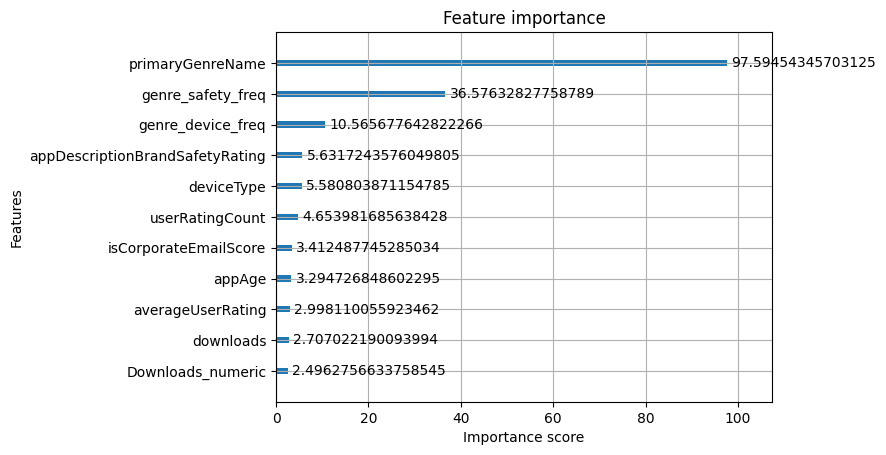

In [ ]:
from xgboost import plot_importance
plot_importance(model,importance_type='gain',max_num_features=20)
plt.show()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np
import lightgbm as lgb

# Cek jumlah kelas
num_classes = len(np.unique(y_train))
print("Jumlah kelas:", num_classes)

# Hitung class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Buat sample weights
sample_weights = [class_weight_dict[label] for label in y_train]

# Tentukan objective
if num_classes == 2:
    objective = 'binary'
else:
    objective = 'multiclass'

# Parameter LightGBM
lgb_params = {
'lambda_l2': 0.02423540444928535, 'lambda_l1': 0.0026006587325427613, 'subsample': 0.95643858247277, 'colsample_bytree': 0.6576609916161111, 'learning_rate': 0.034087010779458469, 'max_depth': 4, 'min_child_weight': 5
}

# Inisialisasi model
model = lgb.LGBMClassifier(
    n_estimators=67,
    **lgb_params,min_data_in_leaf=10
)

# Train model
model.fit(
    X_train, y_train,
    sample_weight=sample_weights
)

# Prediksi probabilitas
val_probs = model.predict_proba(X_test)

# AUC Score
if num_classes == 2:
    val_preds = val_probs[:, 1]
    print("AUC Val:", roc_auc_score(y_test, val_preds))
else:
    print("AUC Val (multiclass):", roc_auc_score(y_test, val_probs, multi_class='ovr'))

# Prediksi kelas akhir
y_pred = np.argmax(val_probs, axis=1) if num_classes > 2 else model.predict(X_test)

# Classification report
print("=== Classification Report (LightGBM - Before SMOTE) ===")
print(classification_report(y_test, y_pred))


Jumlah kelas: 2
AUC Val: 0.895720536972484
=== Classification Report (LightGBM - Before SMOTE) ===
              precision    recall  f1-score   support

       False       0.99      0.74      0.84      1261
        True       0.28      0.94      0.43       139

    accuracy                           0.76      1400
   macro avg       0.64      0.84      0.64      1400
weighted avg       0.92      0.76      0.80      1400



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier

# Tentukan jumlah fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Hitung class weights untuk mengatasi ketidakseimbangan kelas
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Tentukan sample_weights
sample_weights = np.array([class_weight_dict[label] for label in y_train])

# Inisialisasi variabel untuk menyimpan hasil
auc_scores = []
classification_reports = []

# K-Fold Cross Validation
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    print(f"\n=== Fold {fold + 1} ===")
    
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Inisialisasi model CatBoost
    model = CatBoostClassifier(
        iterations=500,
        eval_metric='AUC',
        verbose=50,
        auto_class_weights='Balanced',  # Untuk mengatasi imbalance class
        use_best_model=True
    )
    
    # Training model dengan sample weights
    model.fit(X_train_fold, y_train_fold, sample_weight=sample_weights[train_index], eval_set=(X_val_fold, y_val_fold))
    
    # Prediksi probabilitas pada data validation
    val_probs = model.predict_proba(X_val_fold)
    
    # AUC Score
    if len(np.unique(y_train_fold)) == 2:
        val_preds = val_probs[:, 1]
        auc_score = roc_auc_score(y_val_fold, val_preds)
    else:
        auc_score = roc_auc_score(y_val_fold, val_probs, multi_class='ovr')
    
    auc_scores.append(auc_score)
    
    # Prediksi kelas akhir
    y_pred = np.argmax(val_probs, axis=1) if len(np.unique(y_train_fold)) > 2 else model.predict(X_val_fold)
    
    # Classification report
    classification_reports.append(classification_report(y_val_fold, y_pred))

    print(f"AUC Score (Fold {fold + 1}):", auc_score)

# Rata-rata AUC dari semua fold
print("\n=== Average AUC Score ===")
print(np.mean(auc_scores))

# Classification Report Summary
print("\n=== Classification Report Summary ===")
for i, report in enumerate(classification_reports):
    print(f"\n=== Fold {i + 1} ===")
    print(report)



=== Fold 1 ===
Learning rate set to 0.062037
0:	test: 0.8389624	best: 0.8389624 (0)	total: 3.81ms	remaining: 1.9s
50:	test: 0.8829188	best: 0.8829188 (50)	total: 162ms	remaining: 1.42s
100:	test: 0.8815636	best: 0.8843847 (58)	total: 313ms	remaining: 1.24s
150:	test: 0.8803589	best: 0.8843847 (58)	total: 471ms	remaining: 1.09s
200:	test: 0.8771347	best: 0.8843847 (58)	total: 655ms	remaining: 975ms
250:	test: 0.8766121	best: 0.8843847 (58)	total: 840ms	remaining: 834ms
300:	test: 0.8756289	best: 0.8843847 (58)	total: 1.01s	remaining: 667ms
350:	test: 0.8766697	best: 0.8843847 (58)	total: 1.18s	remaining: 503ms
400:	test: 0.8727457	best: 0.8843847 (58)	total: 1.35s	remaining: 334ms
450:	test: 0.8711602	best: 0.8843847 (58)	total: 1.53s	remaining: 166ms
499:	test: 0.8689192	best: 0.8843847 (58)	total: 1.69s	remaining: 0us

bestTest = 0.8843847435
bestIteration = 58

Shrink model to first 59 iterations.
AUC Score (Fold 1): 0.8843847434807257

=== Fold 2 ===
Learning rate set to 0.062037
0

In [ ]:
# import optuna
# from catboost import CatBoostClassifier
# from sklearn.metrics import roc_auc_score, classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Cek jumlah kelas
# num_classes = len(np.unique(y_train))
# print("Jumlah kelas:", num_classes)


# # Fungsi objektif untuk Optuna
# def objective(trial):
#     # Tentukan parameter yang akan dicoba
#     params = {
#         'iterations': 500,
#         'eval_metric': 'AUC',
#         'verbose': False,
#         'auto_class_weights': 'Balanced',
#         'use_best_model': True,
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
#         'depth': trial.suggest_int('depth', 4, 12),
#         'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e5),
#         # Pilih max_bin di sini
#         'max_bin': trial.suggest_int('max_bin', 100, 300),
#         # Hapus atau komentar border_count
#         # 'border_count': trial.suggest_int('border_count', 32, 255),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 20),
#         'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
#     }


#     # Inisialisasi model CatBoost dengan parameter yang dipilih oleh Optuna
#     model = CatBoostClassifier(**params)
    
#     # Training model dengan sample weights
#     model.fit(X_train, y_train, eval_set=(X_test, y_test))
    
#     # Prediksi probabilitas pada data uji
#     val_probs = model.predict_proba(X_test)

#     # AUC Score
#     if len(np.unique(y_train)) == 2:
#         val_preds = val_probs[:, 1]
#         auc_score = roc_auc_score(y_test, val_preds)
#     else:
#         auc_score = roc_auc_score(y_test, val_probs, multi_class='ovr')

#     return auc_score

# # Tentukan jumlah trial dan start study
# study = optuna.create_study(direction='maximize')  # Arahkan untuk memaksimalkan AUC
# study.optimize(objective, n_trials=50)  # Tentukan jumlah trial yang ingin dijalankan

# # Tampilkan parameter terbaik yang ditemukan
# print(f"Best trial: {study.best_trial}")
# print(f"Best AUC: {study.best_value}")
# print(f"Best Parameters: {study.best_params}")

# # Inisialisasi model dengan parameter terbaik
# best_params = study.best_params
# best_model = CatBoostClassifier(**best_params)

# # Training model dengan sample weights
# best_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# # Prediksi probabilitas pada data uji
# val_probs = best_model.predict_proba(X_test)

# # AUC Score
# if len(np.unique(y_train)) == 2:
#     val_preds = val_probs[:, 1]
#     print("AUC Val:", roc_auc_score(y_test, val_preds))
# else:
#     print("AUC Val (multiclass):", roc_auc_score(y_test, val_probs, multi_class='ovr'))

# # Prediksi kelas akhir
# y_pred = np.argmax(val_probs, axis=1) if len(np.unique(y_train)) > 2 else best_model.predict(X_test)

# # Classification report
# print("=== Classification Report (CatBoost - After Tuning) ===")
# print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# ========== Parameter (jika ada) ==========
xgb_params = {
    'gamma': 0.3240298106921918,
    'lambda': 4,
    'alpha': 5,
    'learning_rate': 0.030760689966283828,
    'max_depth': 6,
    'min_child_weight': 9,
    'subsample': 0.8826348956041972,
    'colsample_bytree': 0.762740264880408,
    'objective': "binary:logistic",
    'eval_metric': "auc",
    'use_label_encoder': False,
    'verbosity': 0
}
lgb_params = {
'lambda_l2': 0.02423540444928535, 'lambda_l1': 0.0026006587325427613, 'subsample': 0.95643858247277, 'colsample_bytree': 0.6576609916161111, 'learning_rate': 0.064087010779458469, 'max_depth': 4, 'min_child_weight': 5
}

# ========== Cross Validation Setup ==========

# Membuat sample weights untuk training data (sesuaikan dengan datasetmu)
sample_weights = pd.Series(np.where(y_train == 1, 5, 1), index=y_train.index)  # Contoh bobot lebih besar untuk class minoritas

# Hitung scale_pos_weight untuk XGBoost (berdasarkan sample_weight)
scale_pos_weight = sample_weights[y_train == 0].sum() / sample_weights[y_train == 1].sum()

# Define Base Models
base_models = [
    ('catboost', CatBoostClassifier(
        iterations=200,
        eval_metric='AUC',
        verbose=0,
        auto_class_weights='Balanced',
    )),
    ('lgbm', LGBMClassifier(
        n_estimators=67,
        **lgb_params,
        min_data_in_leaf=10,
        class_weight='balanced',
    )),
    ('xgb', XGBClassifier(
        n_estimators=200,
        **xgb_params,
        scale_pos_weight=scale_pos_weight,
    )),
]

# Meta Model
meta_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear'
)

# Stacking Model
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True
)

# Bagging over Stacking
bagged_stack = BaggingClassifier(
    estimator=stack_model,
    n_estimators=5,
    # max_samples=0.9,
    bootstrap=True
)

# Train model
bagged_stack.fit(X_train, y_train, sample_weight=sample_weights)

# Predict & Evaluate
y_pred = bagged_stack.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, y_pred)
print(f"✅ AUC Score: {score:.5f}")


✅ AUC Score: 0.88871


In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# ===== Parameter Models =====
xgb_params = {
    'gamma': 0.3240298106921918,
    'lambda': 4,
    'alpha': 5,
    'learning_rate': 0.010760689966283828,
    'max_depth': 6,
    'min_child_weight': 9,
    'subsample': 0.8826348956041972,
    'colsample_bytree': 0.762740264880408,
    'objective': "binary:logistic",
    'eval_metric': "auc",
    'use_label_encoder': False,
    'verbosity': 0
}
lgb_params = {
    'lambda_l2': 0.02423540444928535,
    'lambda_l1': 0.0026006587325427613,
    'subsample': 0.95643858247277,
    'colsample_bytree': 0.6576609916161111,
    'learning_rate': 0.034087010779458469,
    'max_depth': 4,
    'min_child_weight': 5
}

# ===== Cross Validation Setup =====
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
auc_scores = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"🔁 Fold {fold + 1}")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Sample weight: contoh bobot lebih besar untuk class minoritas
    sample_weights = pd.Series(np.where(y_train == 1, 5, 1), index=y_train.index)
    
    # Hitung scale_pos_weight untuk XGBoost (berdasarkan sample_weight)
    scale_pos_weight = sample_weights[y_train == 0].sum() / sample_weights[y_train == 1].sum()
    
    # Define base models
    base_models = [
        ('catboost', CatBoostClassifier(
            iterations=200,
            eval_metric='AUC',
            verbose=0,
            auto_class_weights='Balanced',
            random_state=42
        )),
        ('lgbm', LGBMClassifier(
            n_estimators=67,
            **lgb_params,
            min_data_in_leaf=10,
            class_weight='balanced',
            random_state=42
        )),
        ('xgb', XGBClassifier(
            n_estimators=200,
            **xgb_params,
            scale_pos_weight=scale_pos_weight,
            random_state=42
        )),
    ]
    
    # Meta model
    meta_model = LogisticRegression(
        class_weight='balanced',
        solver='liblinear',
        random_state=42
    )
    
    # Stacking
    stack_model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        passthrough=True,
        n_jobs=-1
    )
    
    # Bagging over stacking
    bagged_stack = BaggingClassifier(
        estimator=stack_model,
        n_estimators=5,
        max_samples=0.9,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )
    
    # Fit
    bagged_stack.fit(X_train, y_train, sample_weight=sample_weights)
    
    # Predict & score
    y_pred = bagged_stack.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_pred)
    auc_scores.append(score)
    
    print(f"✅ AUC Fold-{fold + 1}: {score:.5f}")

# Final Score
print(f"\n📊 Mean AUC over {n_splits} folds: {np.mean(auc_scores):.5f} ± {np.std(auc_scores):.5f}")


🔁 Fold 1


CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="NORWAY": Cannot convert 'b'NORWAY'' to float

# Submission

In [ ]:
test.drop(columns='ID', inplace=True)

In [ ]:
submission = pd.read_csv('submission_format.csv')  # Pastikan ada file submission_format.csv
submission['coppaRisk'] = bagged_stack.predict_proba(test)[:, 1]

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Check the submission file
submission.head()


ValueError: X has 12 features, but BaggingClassifier is expecting 20 features as input.

In [ ]:
# create submission file
submission = pd.read_csv('submission_format.csv')
submission['coppaRisk'] = model.predict_proba(test)[:,1]
submission.to_csv('submission.csv', index=False)
submission.head()

,ID,coppaRisk
0,2807,0.082777
1,1742,0.622184
2,806,0.839704
3,2635,0.075399
4,9047,0.029556


In [ ]:
X_train["primaryGenreName"].value_counts()

primaryGenreName
Games                      1456
Education                   403
Business                    344
Entertainment               341
Lifestyle                   274
Tools                       249
Food & Drink                236
Music & Audio               226
Shopping                    212
Productivity                196
Health & Fitness            181
Utilities                   152
Books & Reference           139
Finance                     138
Personalization             130
Travel & Local               85
Social                       81
Communication                64
News & Magazines             64
Photography                  58
Medical                      53
Social Networking            46
Maps & Navigation            45
Sports                       44
Travel                       43
Auto & Vehicles              38
Art & Design                 31
Music                        30
News                         30
Video Players & Editors      26
House & Home           